# Source code for training and testing the various classifiers with various hyperparameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm
import sklearn.tree
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
scaler = MinMaxScaler()

dataset1 = np.loadtxt("project_dataset1.txt", delimiter="\t")
dataset1 = scaler.fit_transform(dataset1)
x1 = dataset1[:, :-1]
y1 = dataset1[:, -1]

xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x1, y1, test_size=0.25, random_state=200)

dataset2 = np.loadtxt("project_dataset2.txt", delimiter="\t", converters={4: lambda y: (0.0 if y == 'Absent' else 1.0)})
dataset2 = scaler.fit_transform(dataset2)
x2 = dataset2[:, :-1]
y2 = dataset2[:, -1]

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size=0.25, random_state=200)

In [3]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
print(sklearn.metrics.get_scorer_names())

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

n_Neighbors = [1, 5, 10, 50, 100, 250]

depth = [None, 5, 10, 25, 100]
num_Trees = [10, 50, 100, 200, 500]

SVMs = [sklearn.svm.SVC(kernel=k, C=c) for k in kernels for c in C]
LRs = [sklearn.linear_model.LogisticRegression(C=c) for c in C]
KNNs = [sklearn.neighbors.KNeighborsClassifier(n_neighbors=n) for n in n_Neighbors]
DTs = [sklearn.tree.DecisionTreeClassifier(max_depth=d, random_state=200) for d in depth]
RFs = [sklearn.ensemble.RandomForestClassifier(n_estimators=n, random_state=200) for n in num_Trees for d in depth]
Boosts = [sklearn.ensemble.AdaBoostClassifier(n_estimators=n, random_state=200) for n in num_Trees for d in depth]

for i in range(len(DTs)**2):
    RFs[i].estimator = DTs[i % len(DTs)]
    Boosts[i].estimator = DTs[i % len(DTs)]
classifiers = SVMs + LRs + KNNs + DTs + RFs + Boosts

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [4]:
def normalizeScore(scores):
    for clf in scores:
        for key in clf:
            clf[key] = np.mean(clf[key])
    return scores

In [5]:
SVMscores1 = [cross_validate(clf, xTrain1, yTrain1, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in SVMs]
SVMscores1 = normalizeScore(SVMscores1)

SVMscores2 = [cross_validate(clf, xTrain2, yTrain2, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in SVMs]
SVMscores2 = normalizeScore(SVMscores2)

In [6]:
LRscores1 = [cross_validate(clf, xTrain1, yTrain1, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in LRs]
LRscores1 = normalizeScore(LRscores1)

LRscores2 = [cross_validate(clf, xTrain2, yTrain2, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in LRs]
LRscores2 = normalizeScore(LRscores2)

In [7]:
KNNscores1 = [cross_validate(clf, xTrain1, yTrain1, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in KNNs]
KNNscores1 = normalizeScore(KNNscores1)

KNNscores2 = [cross_validate(clf, xTrain2, yTrain2, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in KNNs]
KNNscores2 = normalizeScore(KNNscores2)

In [8]:
DTscores1 = [cross_validate(clf, xTrain1, yTrain1, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in DTs]
DTscores1 = normalizeScore(DTscores1)

DTscores2 = [cross_validate(clf, xTrain2, yTrain2, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in DTs]
DTscores2 = normalizeScore(DTscores2)

In [9]:
RFscores1 = [cross_validate(clf, xTrain1, yTrain1, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in RFs]
print(RFscores1)
RFscores1 = normalizeScore(RFscores1)

RFscores2 = [cross_validate(clf, xTrain2, yTrain2, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in RFs]
print(RFscores2)
RFscores2 = normalizeScore(RFscores2)

[{'fit_time': array([0.01463509, 0.01269817, 0.01295304, 0.01298809, 0.01282096,
       0.01286077, 0.01264691, 0.01339698, 0.01269698, 0.01278901]), 'score_time': array([0.00353885, 0.00330186, 0.00341773, 0.00336599, 0.00337791,
       0.00335693, 0.00335002, 0.00327897, 0.00320315, 0.00317526]), 'test_accuracy': array([0.97674419, 0.93023256, 1.        , 0.88372093, 0.93023256,
       0.90697674, 0.92857143, 0.95238095, 1.        , 0.97619048]), 'train_accuracy': array([0.99477807, 0.99477807, 0.99477807, 0.99477807, 0.99738903,
       1.        , 0.99479167, 1.        , 0.99739583, 0.99739583]), 'test_precision': array([1.        , 1.        , 1.        , 0.86666667, 0.88235294,
       0.875     , 1.        , 0.93333333, 1.        , 0.9375    ]), 'train_precision': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9929078 , 1.        , 0.99295775, 0.99295775]), 'test_recall': array([0.9375    , 0.8125    , 1.        , 0.8125    , 0.9375    ,
  

In [10]:
BoostScores1 = [cross_validate(clf, xTrain1, yTrain1, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in Boosts]
print(BoostScores1)
BoostScores1 = normalizeScore(BoostScores1)

BoostScores2 = [cross_validate(clf, xTrain2, yTrain2, cv=10, return_train_score=True, scoring=scoring_metrics) for clf in Boosts]
print(BoostScores2)
BoostScores2 = normalizeScore(BoostScores2)

[{'fit_time': array([0.00716281, 0.00636506, 0.00770473, 0.00830889, 0.00634408,
       0.00648713, 0.00643921, 0.00580502, 0.00609779, 0.00636005]), 'score_time': array([0.00268793, 0.00256085, 0.002666  , 0.00258112, 0.00236487,
       0.00229812, 0.00226212, 0.0022223 , 0.00223422, 0.00221491]), 'test_accuracy': array([0.88372093, 0.90697674, 0.95348837, 0.90697674, 0.86046512,
       0.95348837, 0.9047619 , 0.92857143, 0.95238095, 0.80952381]), 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_precision': array([0.86666667, 0.875     , 0.88888889, 0.83333333, 0.77777778,
       1.        , 1.        , 0.92857143, 0.88235294, 0.73333333]), 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_recall': array([0.8125    , 0.875     , 1.        , 0.9375    , 0.875     ,
       0.875     , 0.73333333, 0.86666667, 1.        , 0.73333333]), 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_f1': array([0.83870968, 0.875     , 

# Plots for report on bias-variance tradeoff

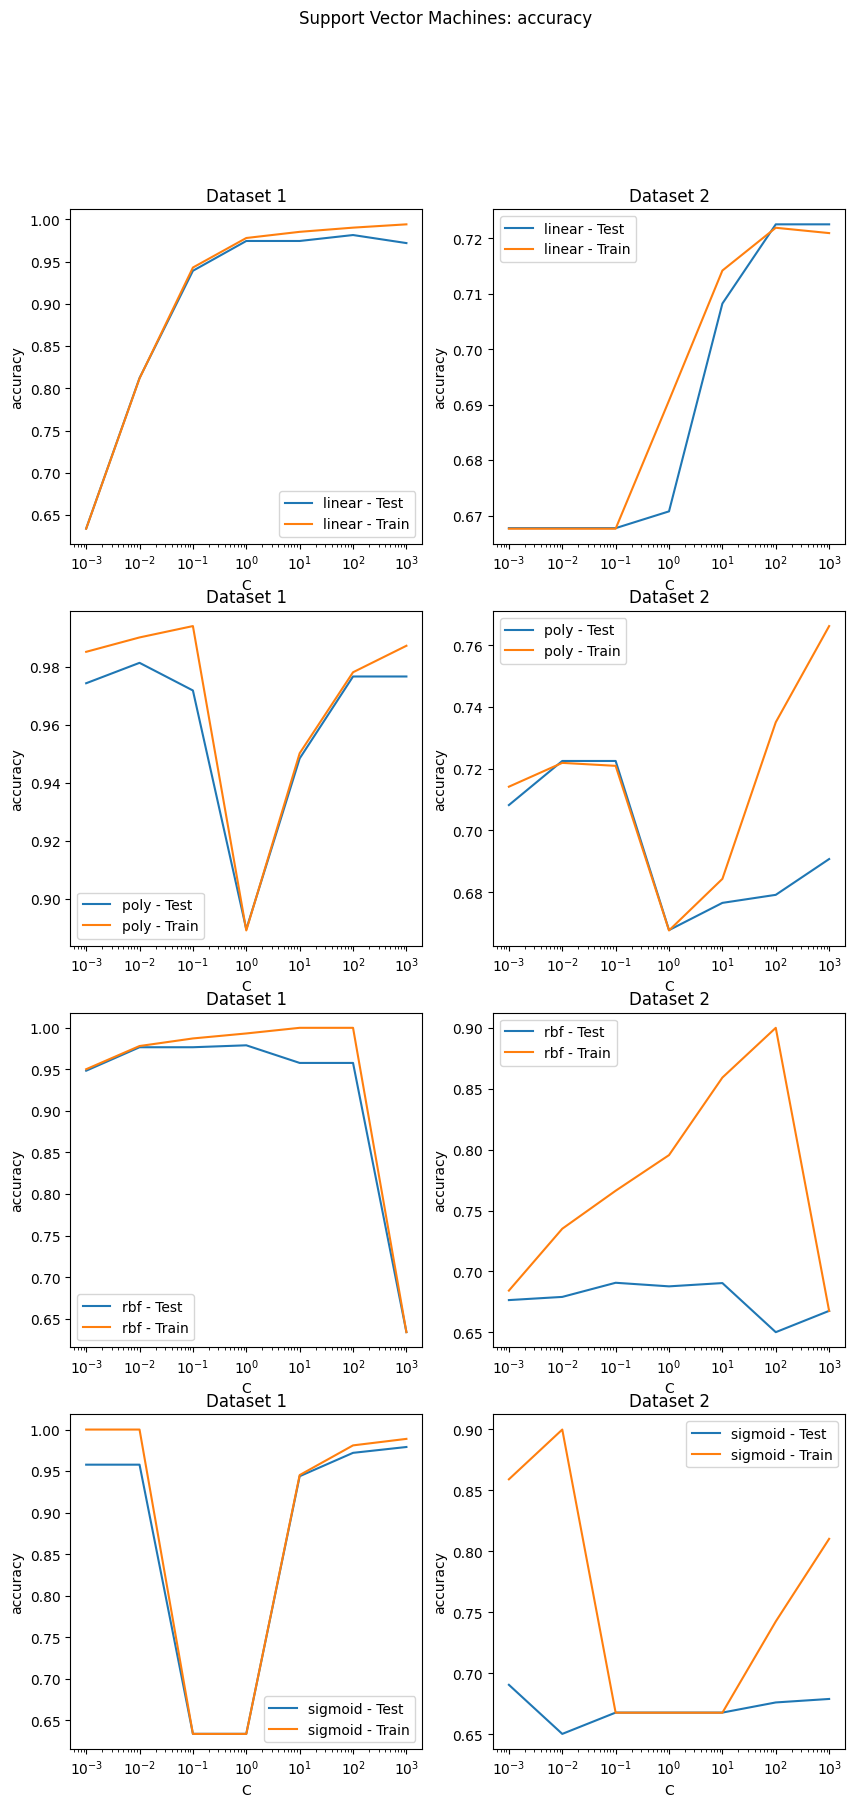

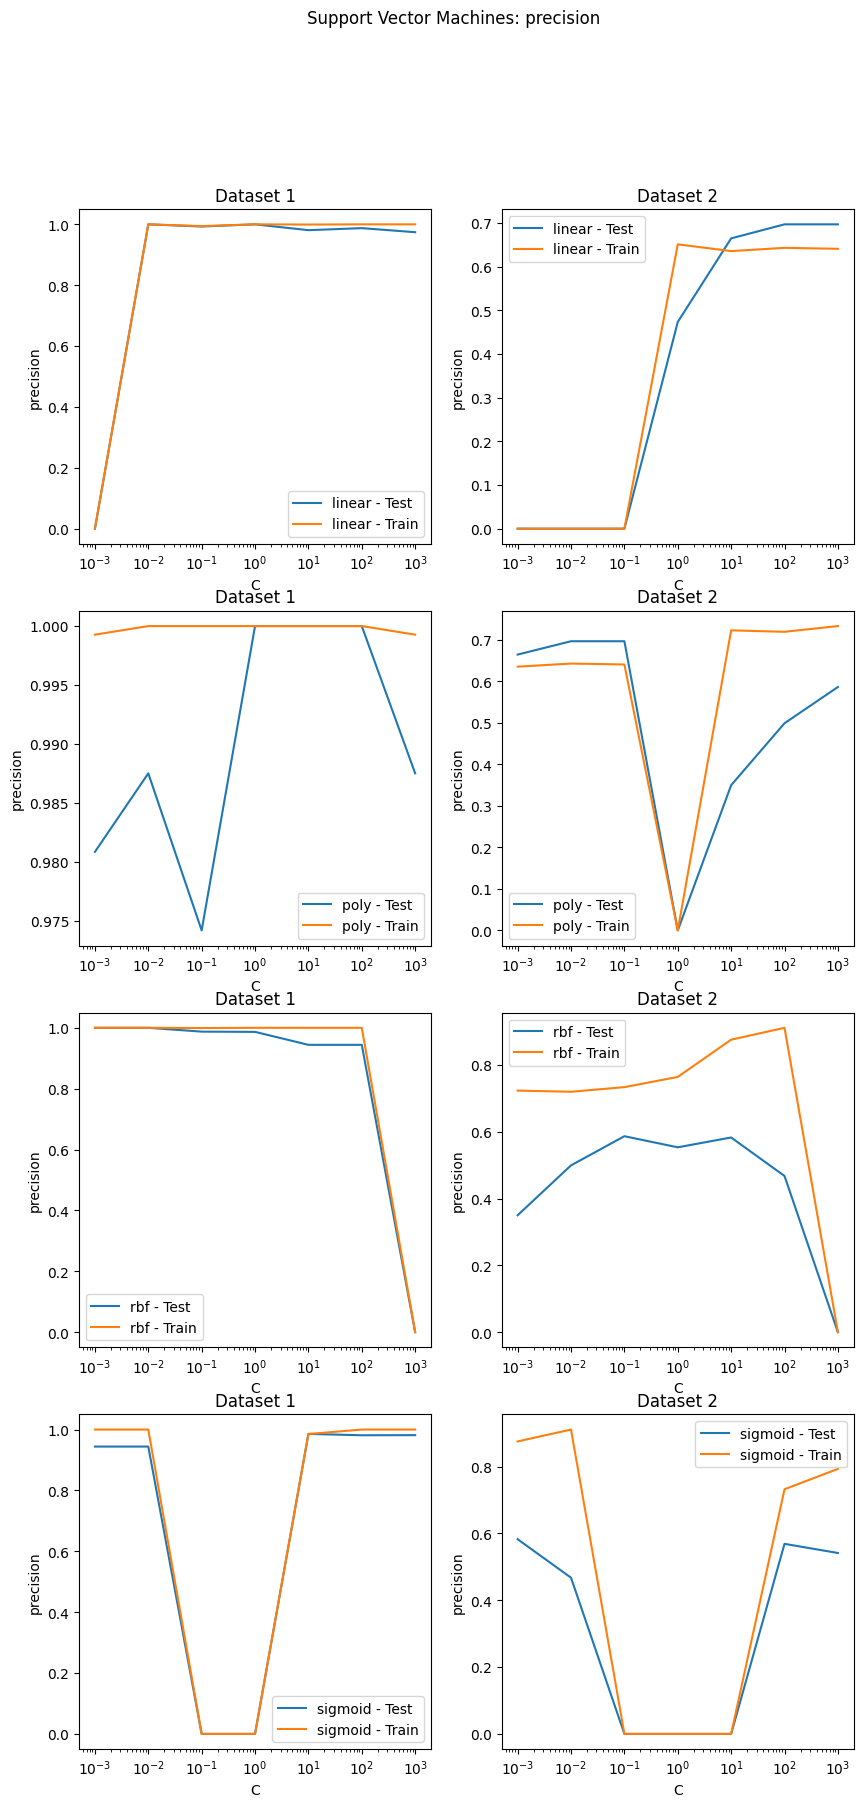

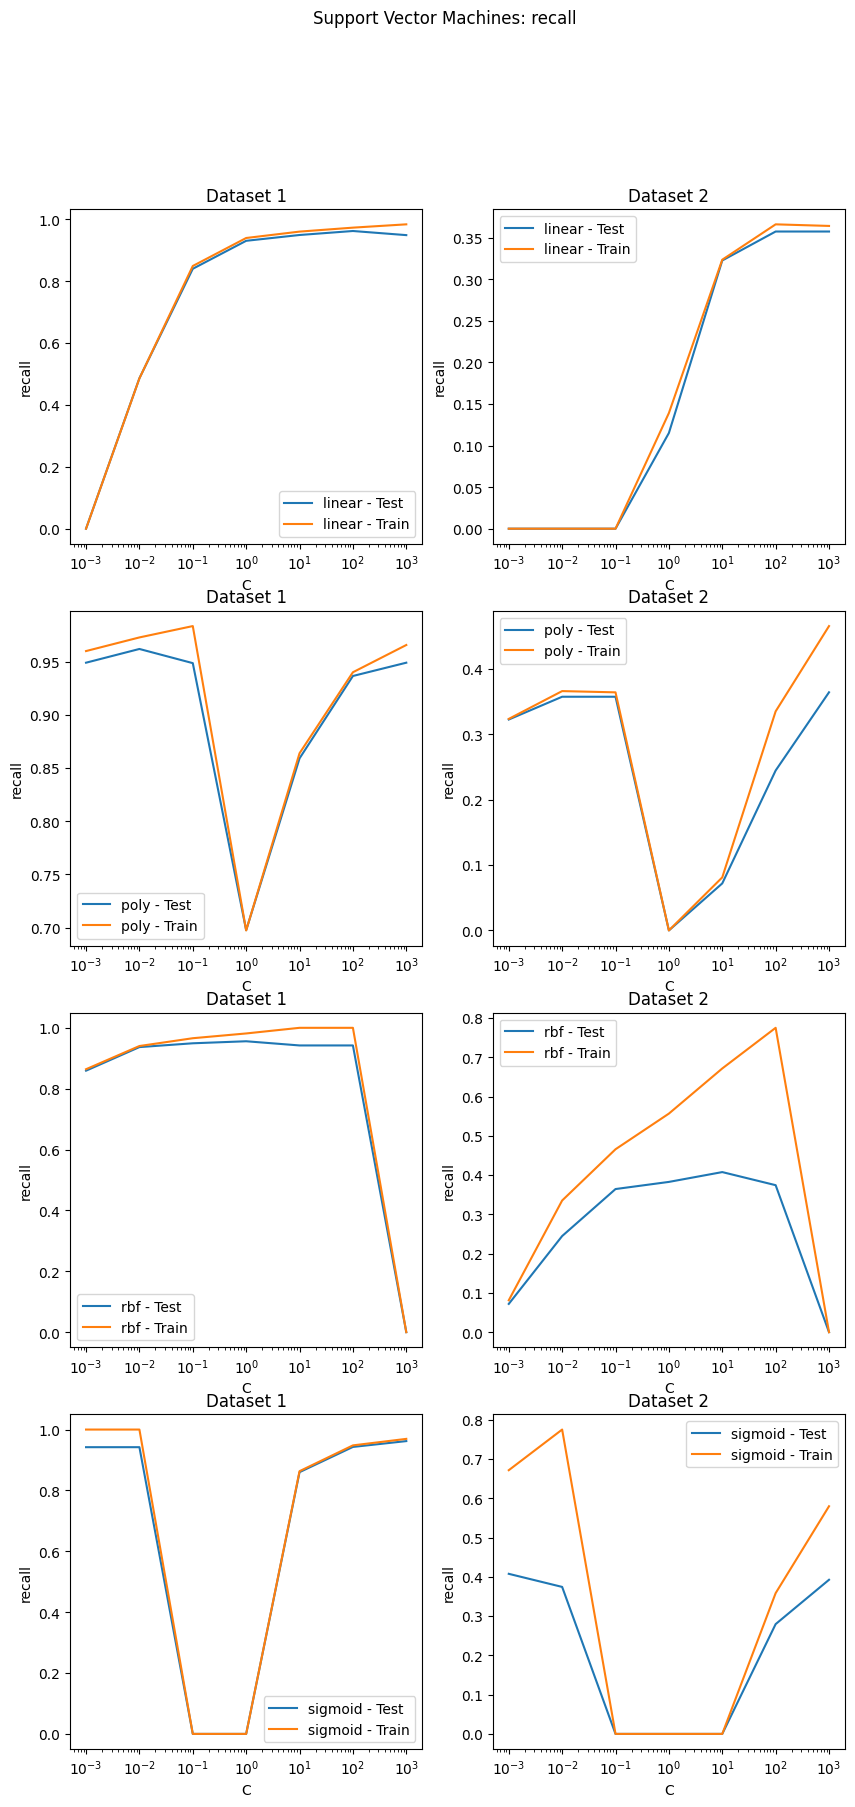

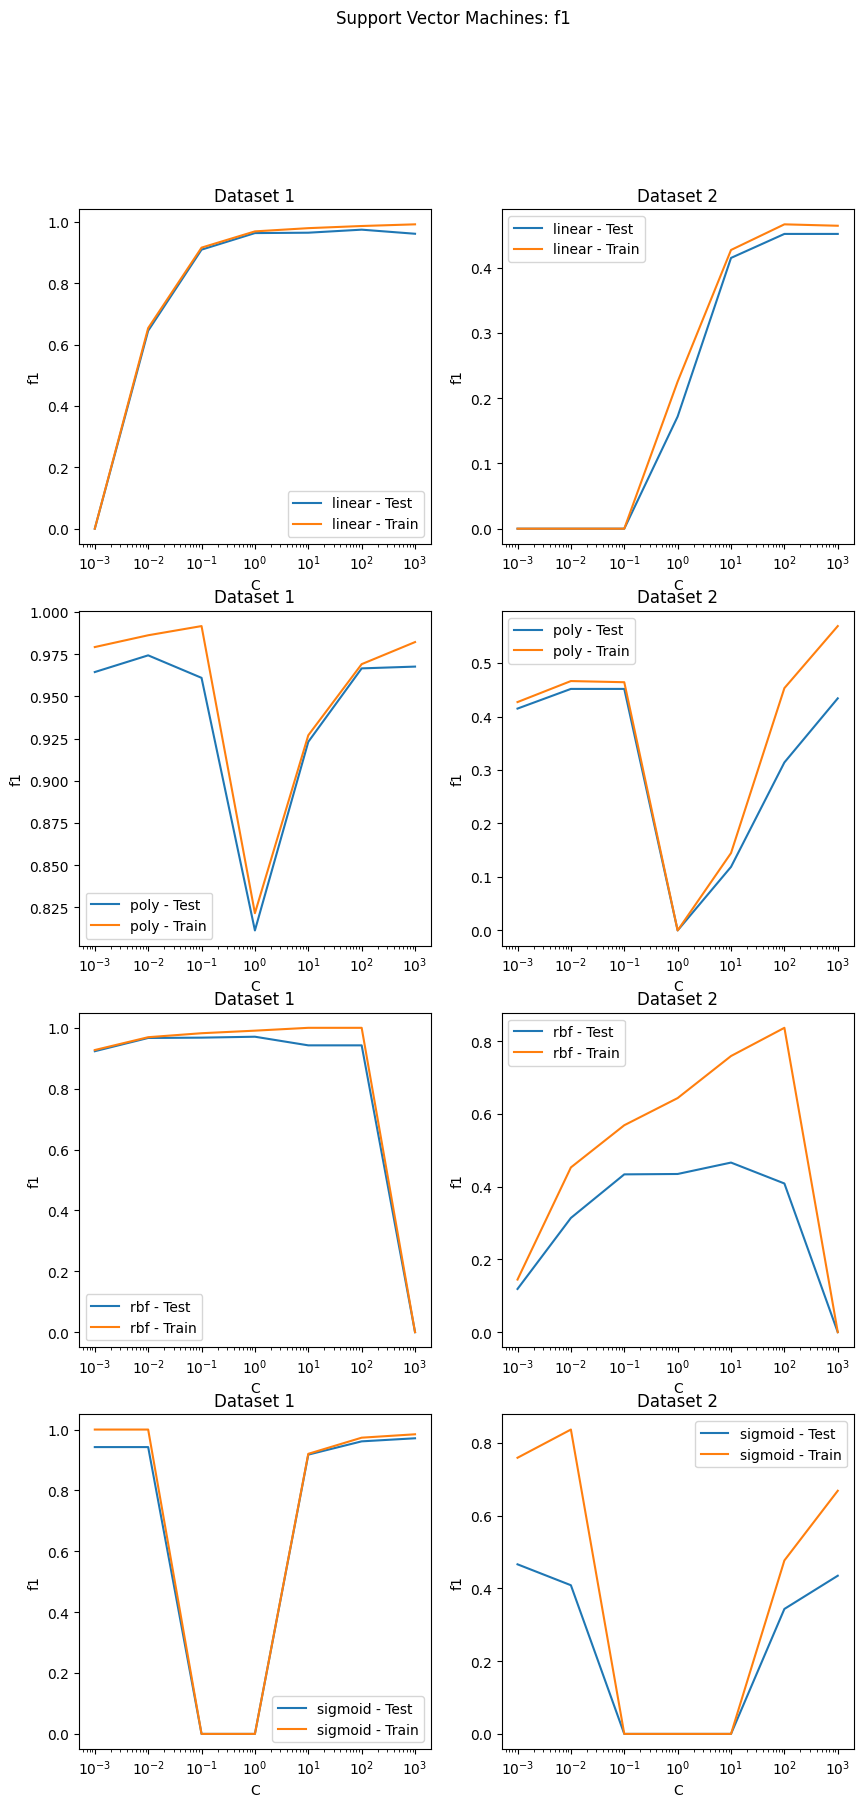

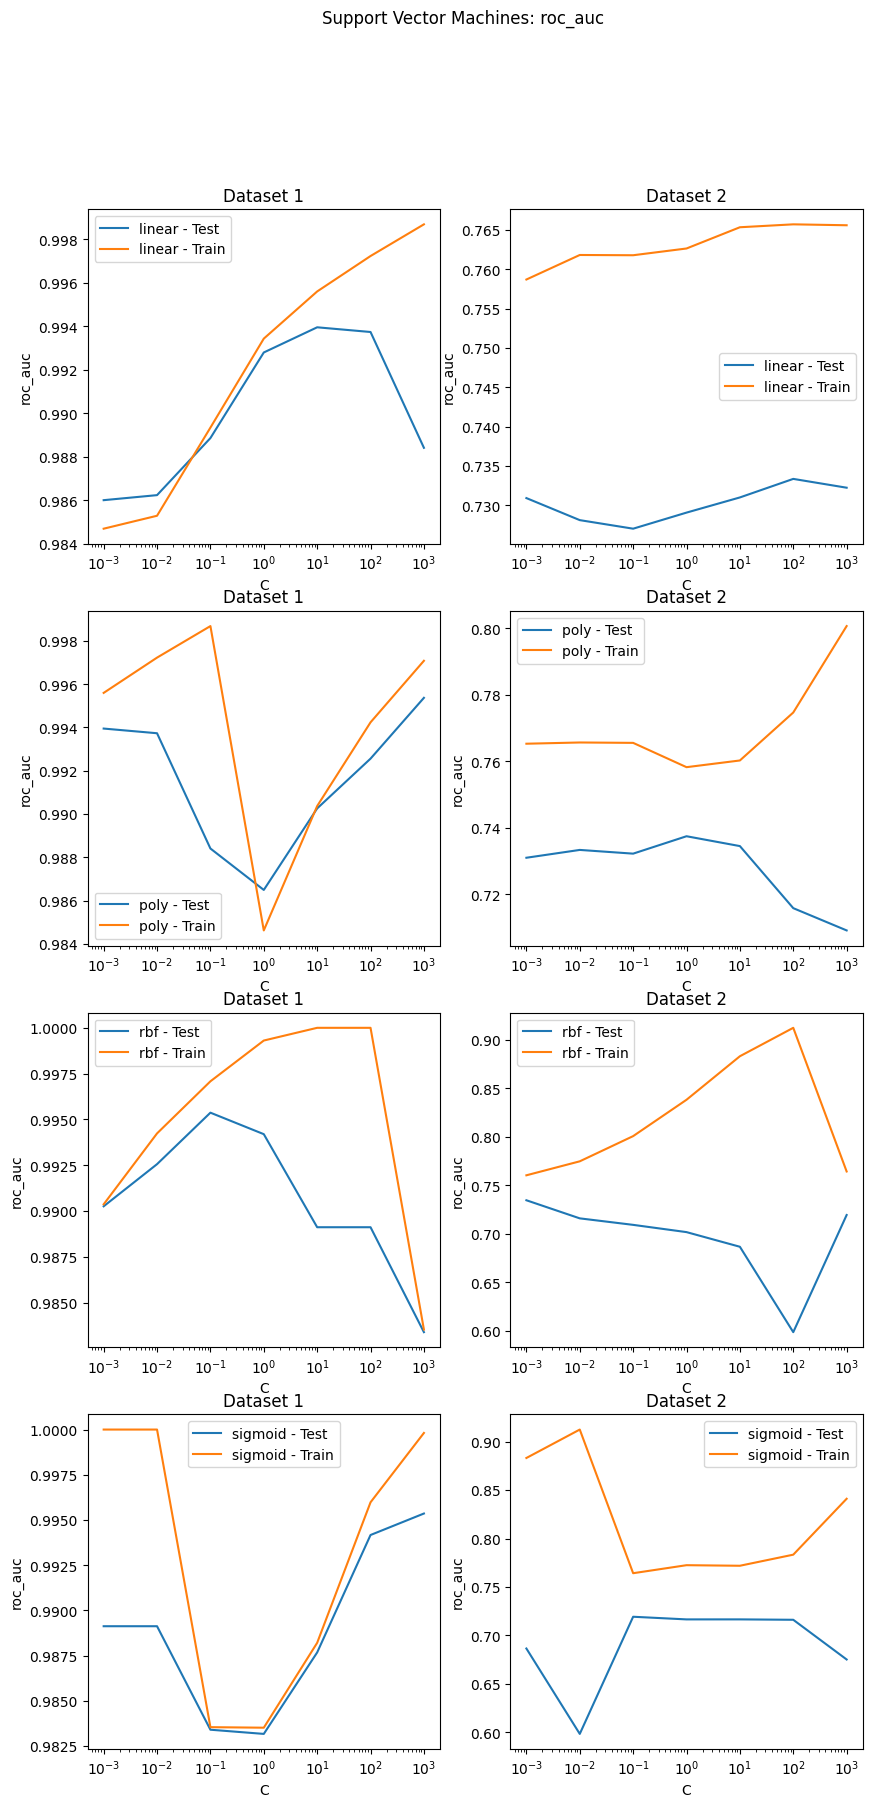

In [11]:
for sc in scoring_metrics:
    fig2, axs2 = plt.subplots(4, 2, figsize=(10, 20))
    testAcc1, trainAcc1, testAcc2, trainAcc2 = [], [], [], []
    for i in range(len(kernels)):
        tac1, trac1, tac2, trac2 = [], [], [], []
        for j in range(len(C)):
            tac1.append(SVMscores1[i*len(kernels)+j][f'test_{sc}'])
            trac1.append(SVMscores1[i*len(kernels)+j][f'train_{sc}'])
            tac2.append(SVMscores2[i*len(kernels)+j][f'test_{sc}'])
            trac2.append(SVMscores2[i*len(kernels)+j][f'train_{sc}'])
        testAcc1.append(tac1)
        trainAcc1.append(trac1)
        testAcc2.append(tac2)
        trainAcc2.append(trac2)

    for i in range(len(kernels)):
        axs2[i][0].plot(C, testAcc1[i], label=f"{kernels[i]} - Test")
        axs2[i][0].plot(C, trainAcc1[i], label=f"{kernels[i]} - Train")
        axs2[i][0].set_title('Dataset 1')
        axs2[i][1].plot(C, testAcc2[i], label=f"{kernels[i]} - Test")
        axs2[i][1].plot(C, trainAcc2[i], label=f"{kernels[i]} - Train")
        axs2[i][1].set_title('Dataset 2')

    for axs in axs2:
        for ax in axs:
            ax.legend()
            ax.set_xscale('log')
            ax.set_xlabel('C')
            ax.set_ylabel(sc)
    fig2.suptitle('Support Vector Machines: ' + sc)
    fig2.savefig(f'plots/SVM_{sc}.jpg')

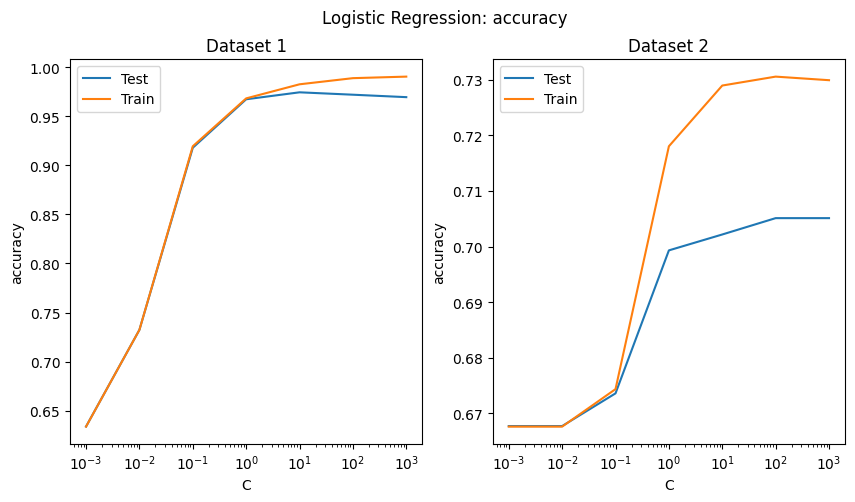

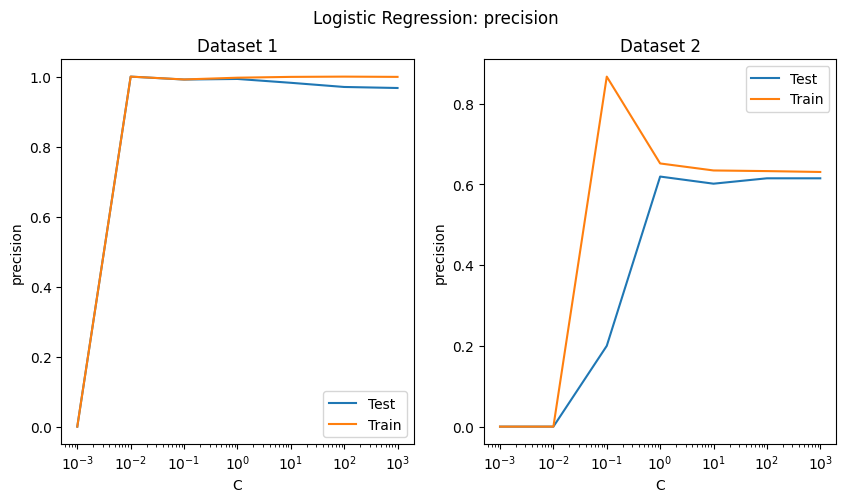

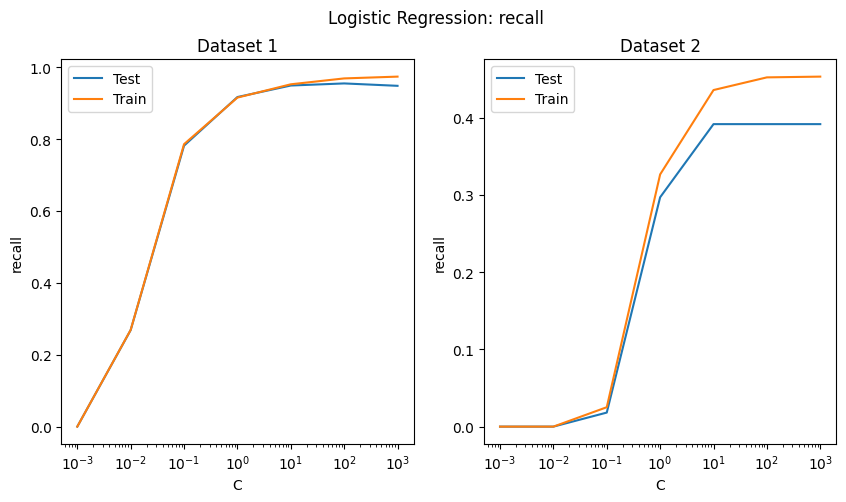

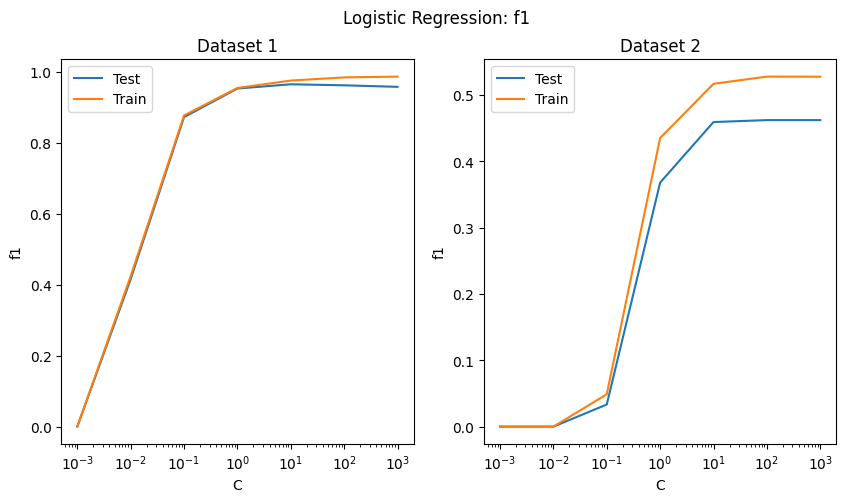

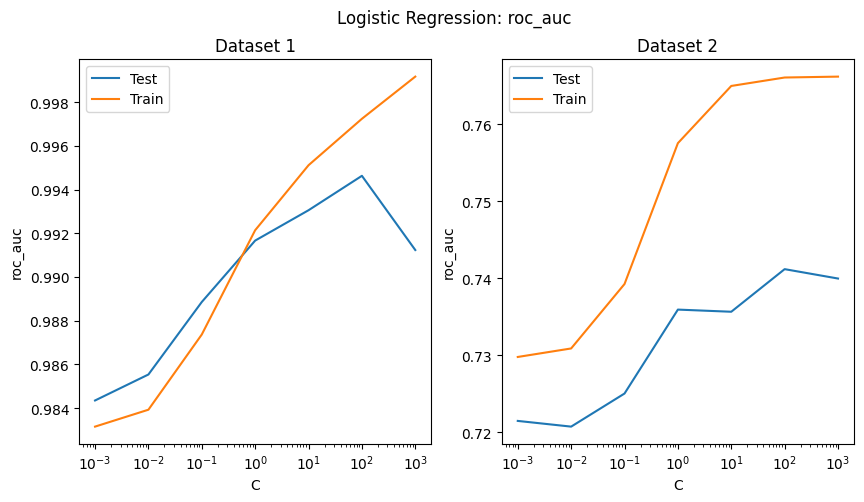

In [12]:
for sc in scoring_metrics:
    fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
    testAcc1, trainAcc1, testAcc2, trainAcc2 = [], [], [], []
    for i in range(len(LRscores1)):
        testAcc1 += [LRscores1[i][f'test_{sc}']]
        trainAcc1 += [LRscores1[i][f'train_{sc}']]
        testAcc2 += [LRscores2[i][f'test_{sc}']]
        trainAcc2 += [LRscores2[i][f'train_{sc}']]

    axs2[0].plot(C, testAcc1, label='Test')
    axs2[0].plot(C, trainAcc1, label='Train')
    axs2[0].set_title('Dataset 1')
    axs2[1].plot(C, testAcc2, label='Test')
    axs2[1].plot(C, trainAcc2, label='Train')
    axs2[1].set_title('Dataset 2')

    for ax in axs2:
        ax.legend()
        ax.set_xscale('log')
        ax.set_xlabel('C')
        ax.set_ylabel(sc)
    fig2.suptitle('Logistic Regression: ' + sc)
    fig2.savefig(f'plots/LR_{sc}.jpg')

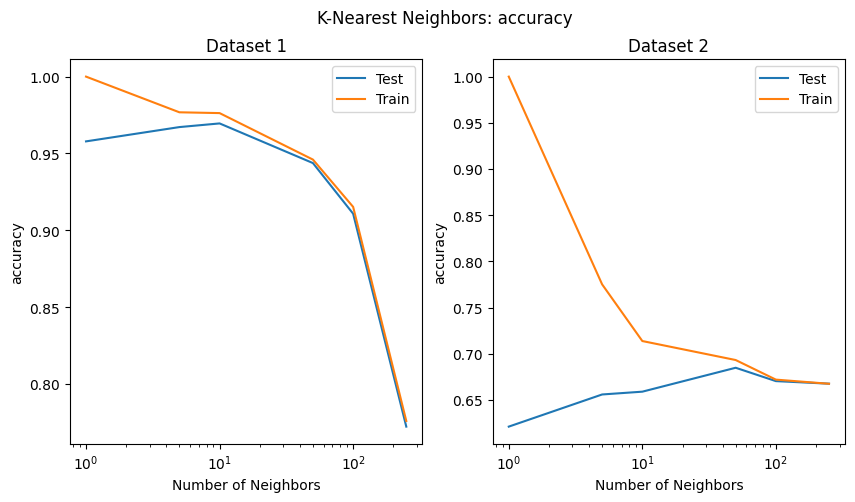

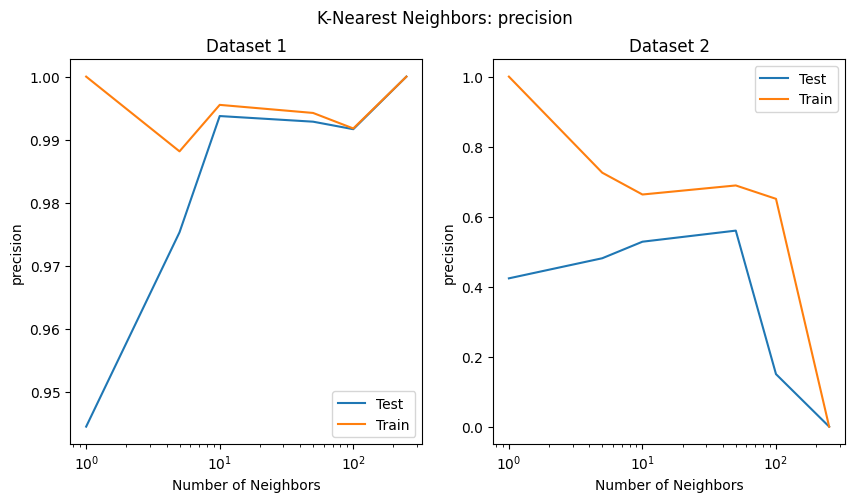

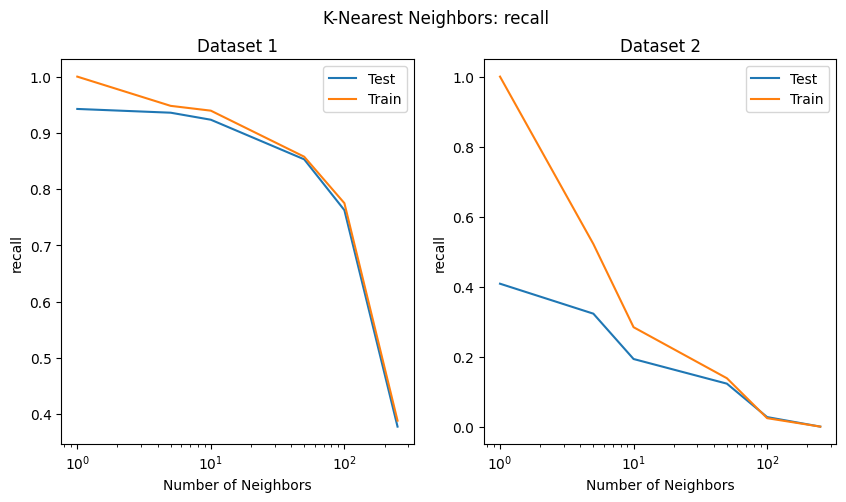

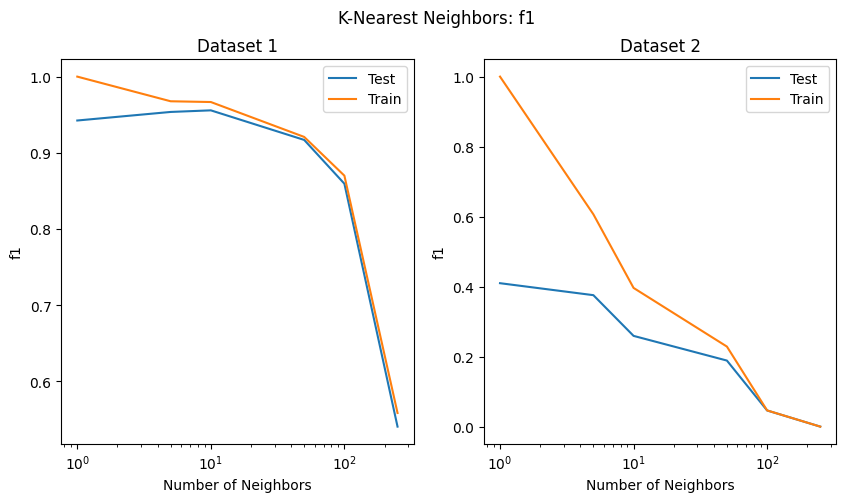

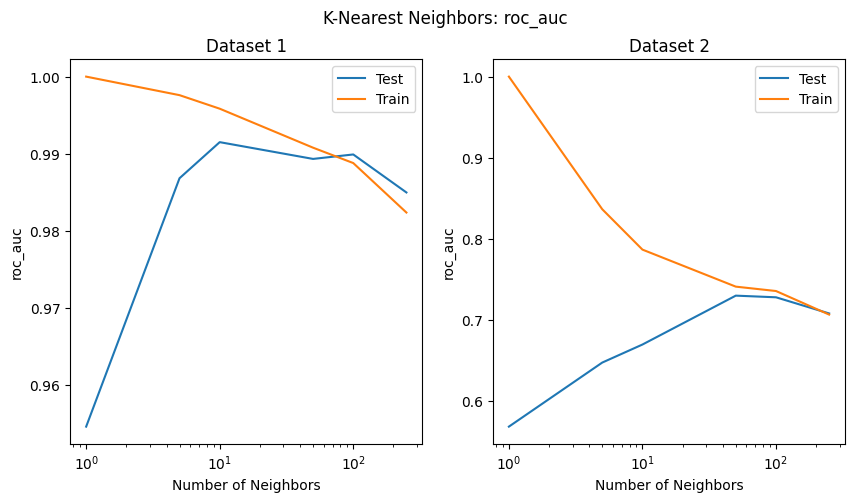

In [13]:
for sc in scoring_metrics:
    fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
    testAcc1, trainAcc1, testAcc2, trainAcc2 = [], [], [], []
    for i in range(len(KNNscores1)):
        testAcc1 += [KNNscores1[i][f'test_{sc}']]
        trainAcc1 += [KNNscores1[i][f'train_{sc}']]
        testAcc2 += [KNNscores2[i][f'test_{sc}']]
        trainAcc2 += [KNNscores2[i][f'train_{sc}']]

    axs2[0].plot(n_Neighbors, testAcc1, label='Test')
    axs2[0].plot(n_Neighbors, trainAcc1, label='Train')
    axs2[0].set_title('Dataset 1')
    axs2[1].plot(n_Neighbors, testAcc2, label='Test')
    axs2[1].plot(n_Neighbors, trainAcc2, label='Train')
    axs2[1].set_title('Dataset 2')

    for ax in axs2:
        ax.legend()
        ax.set_xscale('log')
        ax.set_xlabel('Number of Neighbors')
        ax.set_ylabel(sc)
    fig2.suptitle('K-Nearest Neighbors: ' + sc)
    fig2.savefig(f'plots/KNN_{sc}.jpg')

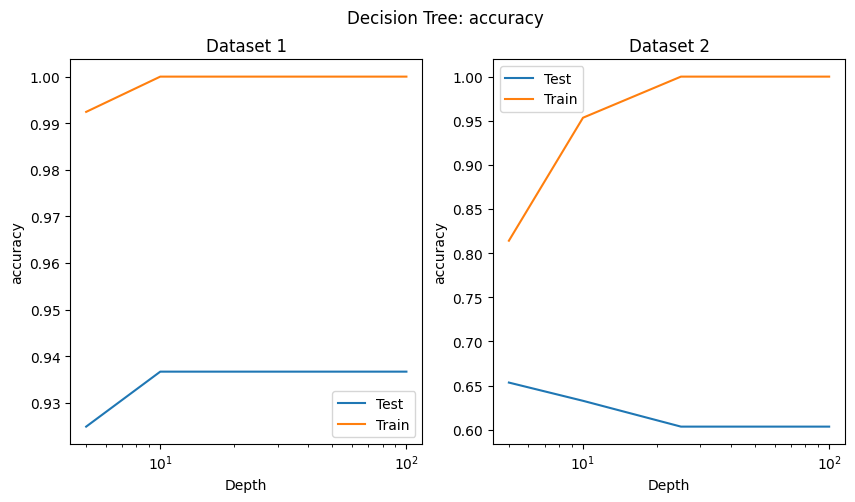

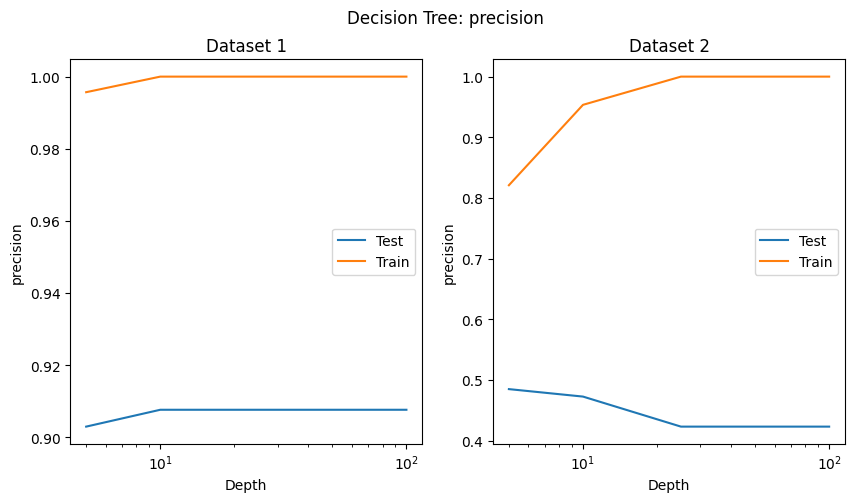

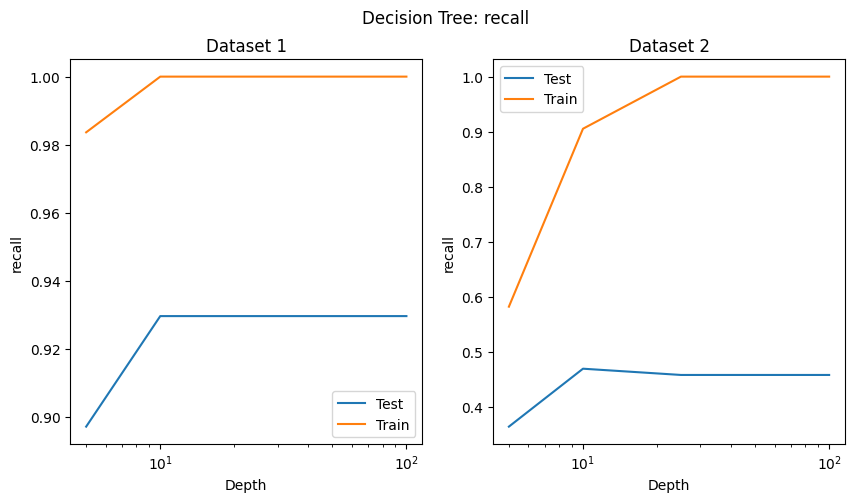

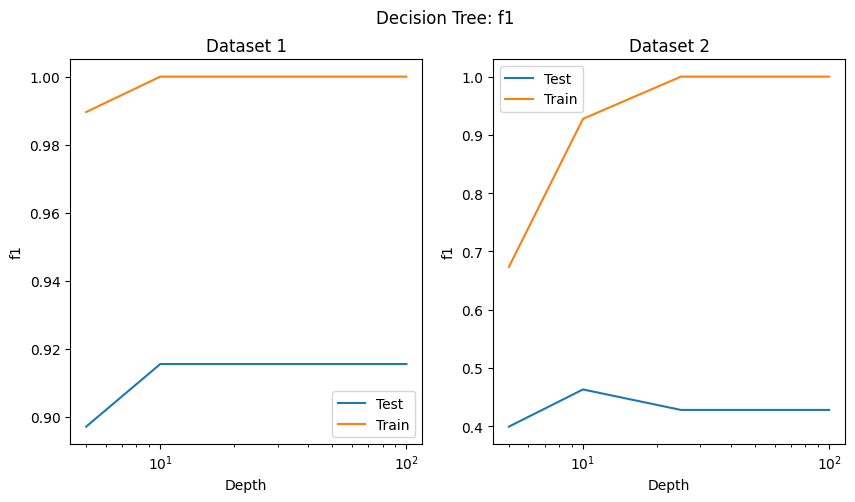

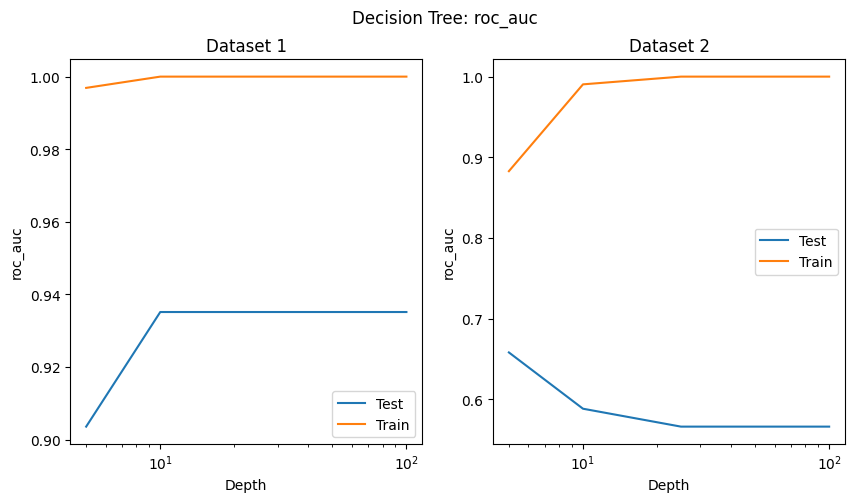

In [14]:
for sc in scoring_metrics:
    fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
    testAcc1, trainAcc1, testAcc2, trainAcc2 = [], [], [], []
    for i in range(len(DTscores1)):
        testAcc1 += [DTscores1[i][f'test_{sc}']]
        trainAcc1 += [DTscores1[i][f'train_{sc}']]
        testAcc2 += [DTscores2[i][f'test_{sc}']]
        trainAcc2 += [DTscores2[i][f'train_{sc}']]

    axs2[0].plot(depth, testAcc1, label='Test')
    axs2[0].plot(depth, trainAcc1, label='Train')
    axs2[0].set_title('Dataset 1')
    axs2[1].plot(depth, testAcc2, label='Test')
    axs2[1].plot(depth, trainAcc2, label='Train')
    axs2[1].set_title('Dataset 2')

    for ax in axs2:
        ax.legend()
        ax.set_xscale('log')
        ax.set_xlabel('Depth')
        ax.set_ylabel(sc)
    fig2.suptitle('Decision Tree: ' + sc)
    fig2.savefig(f'plots/DT_{sc}.jpg')

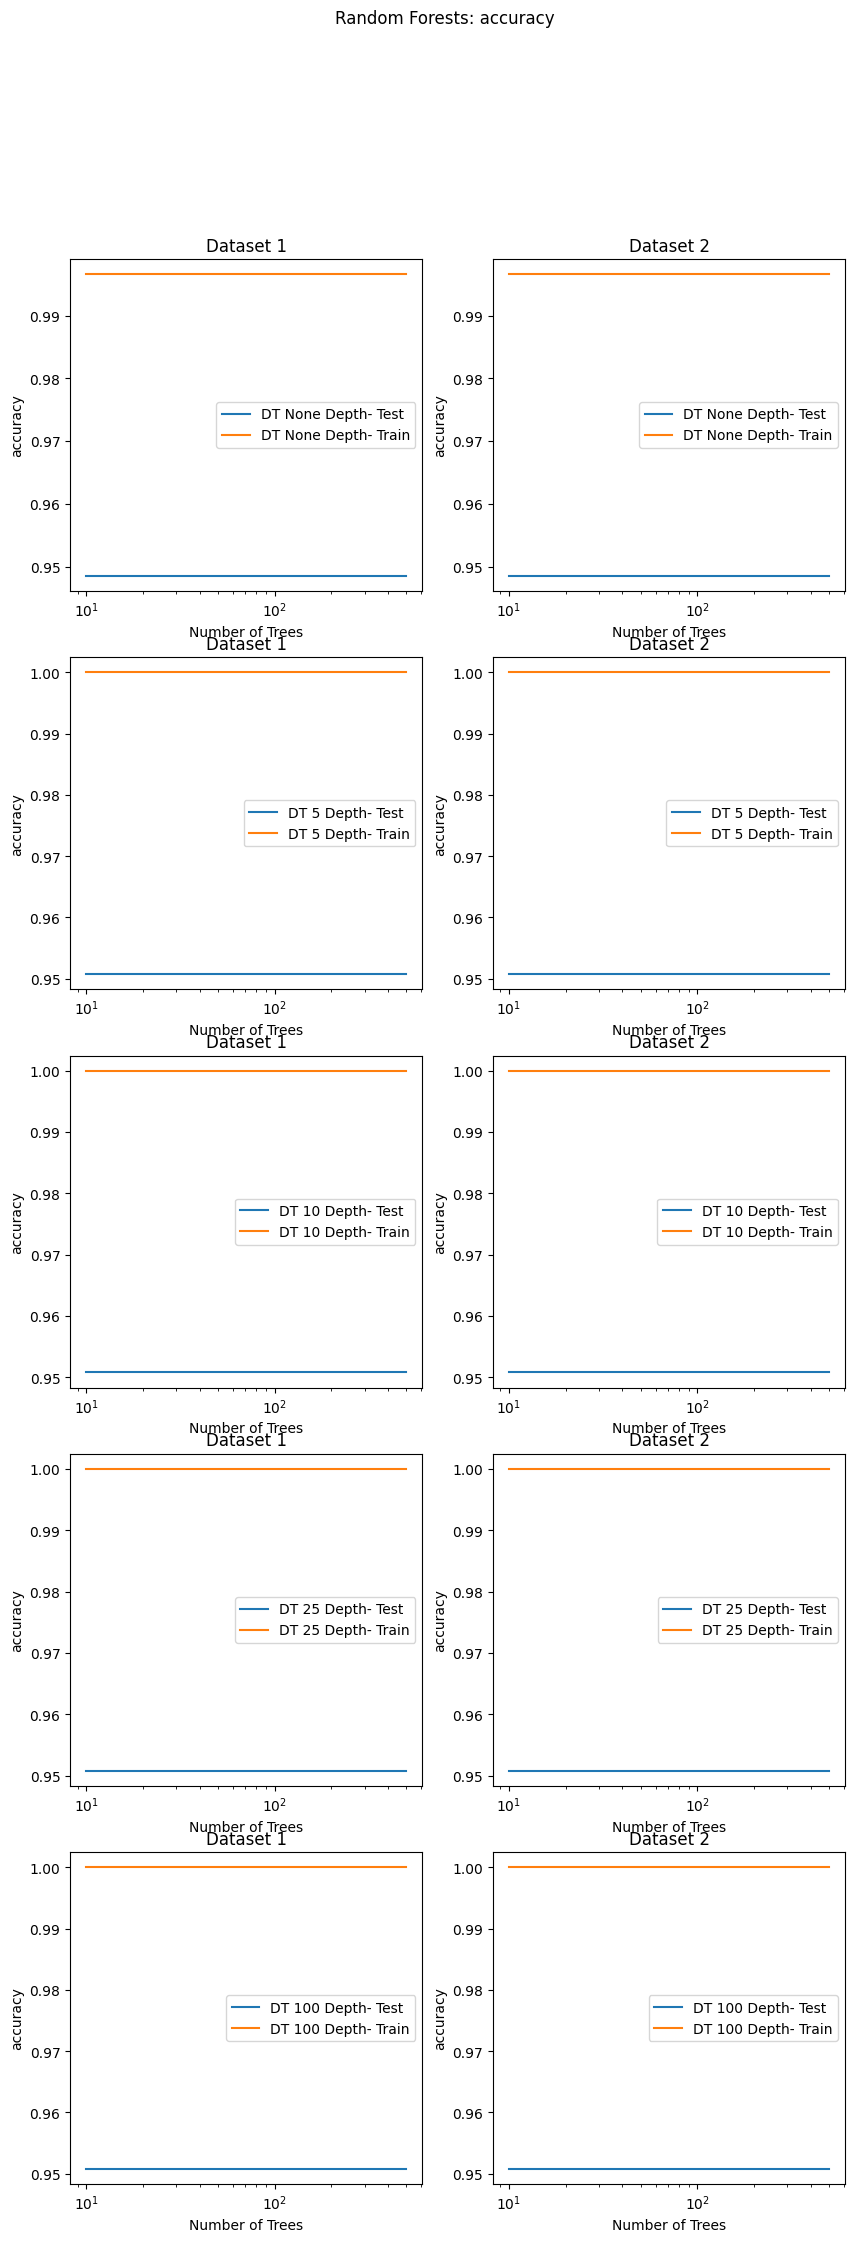

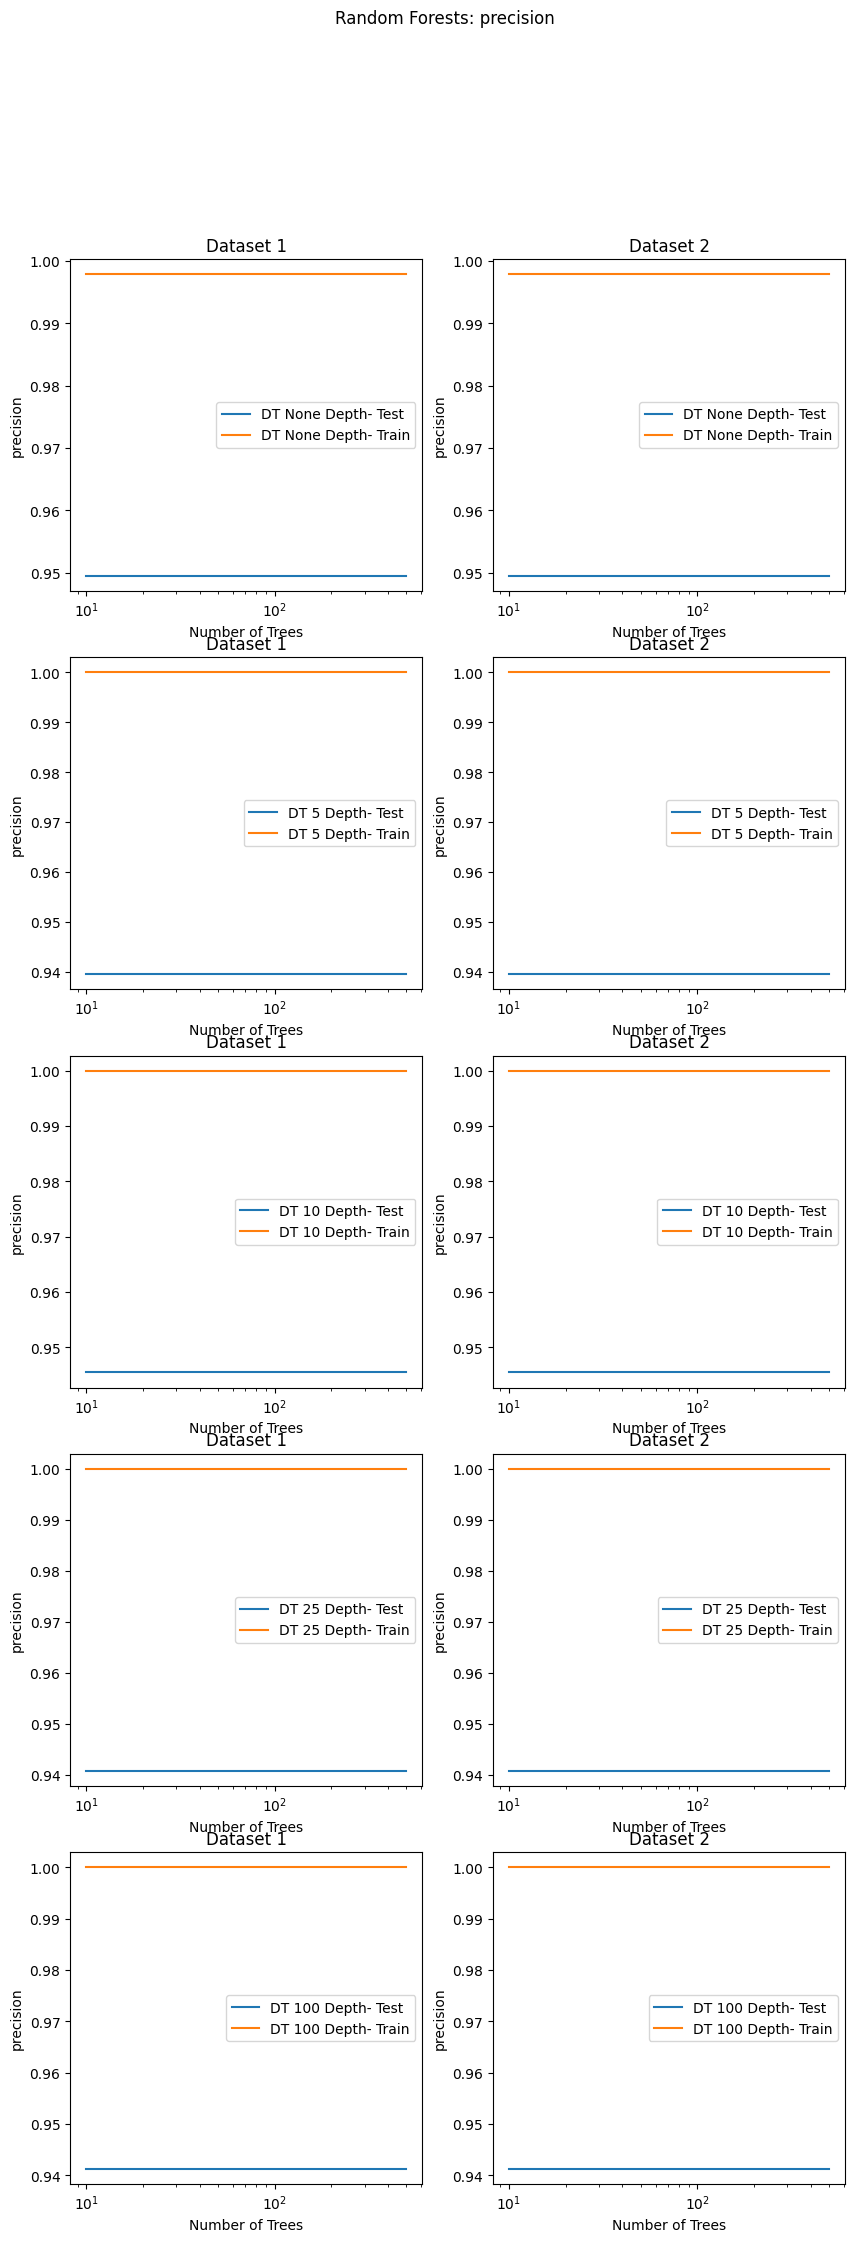

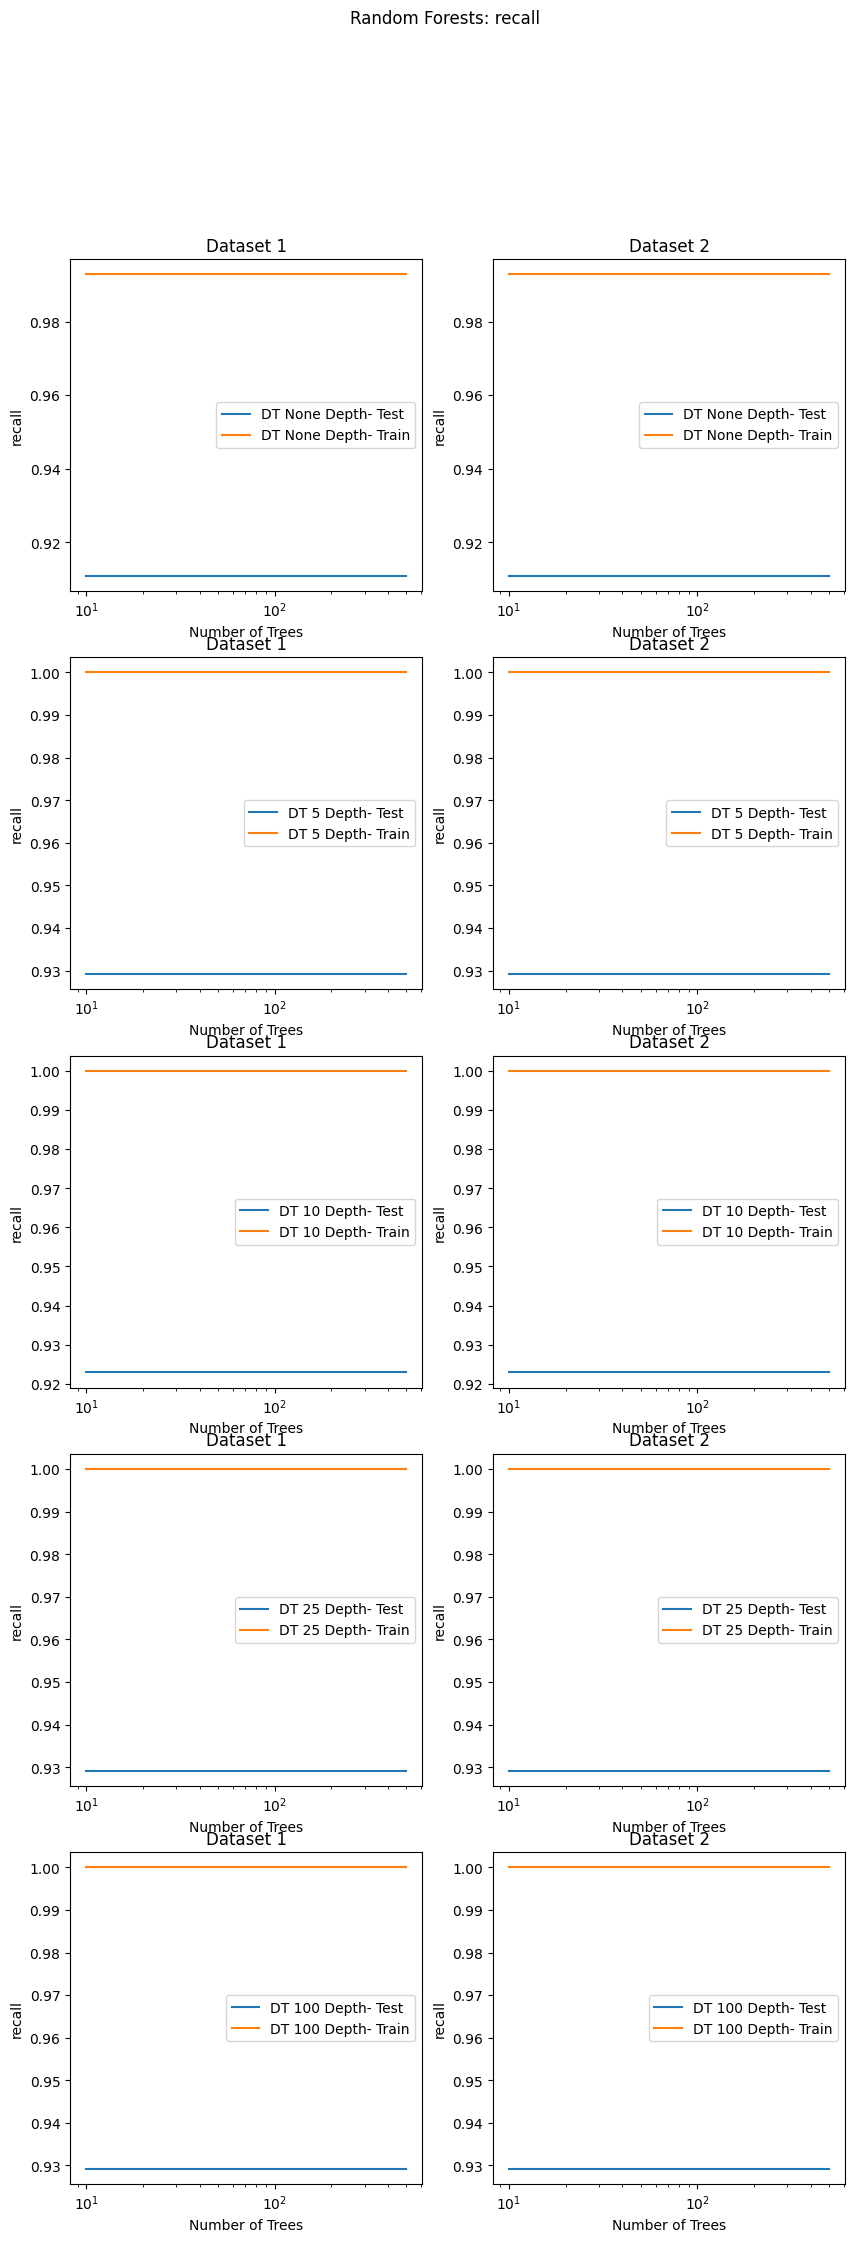

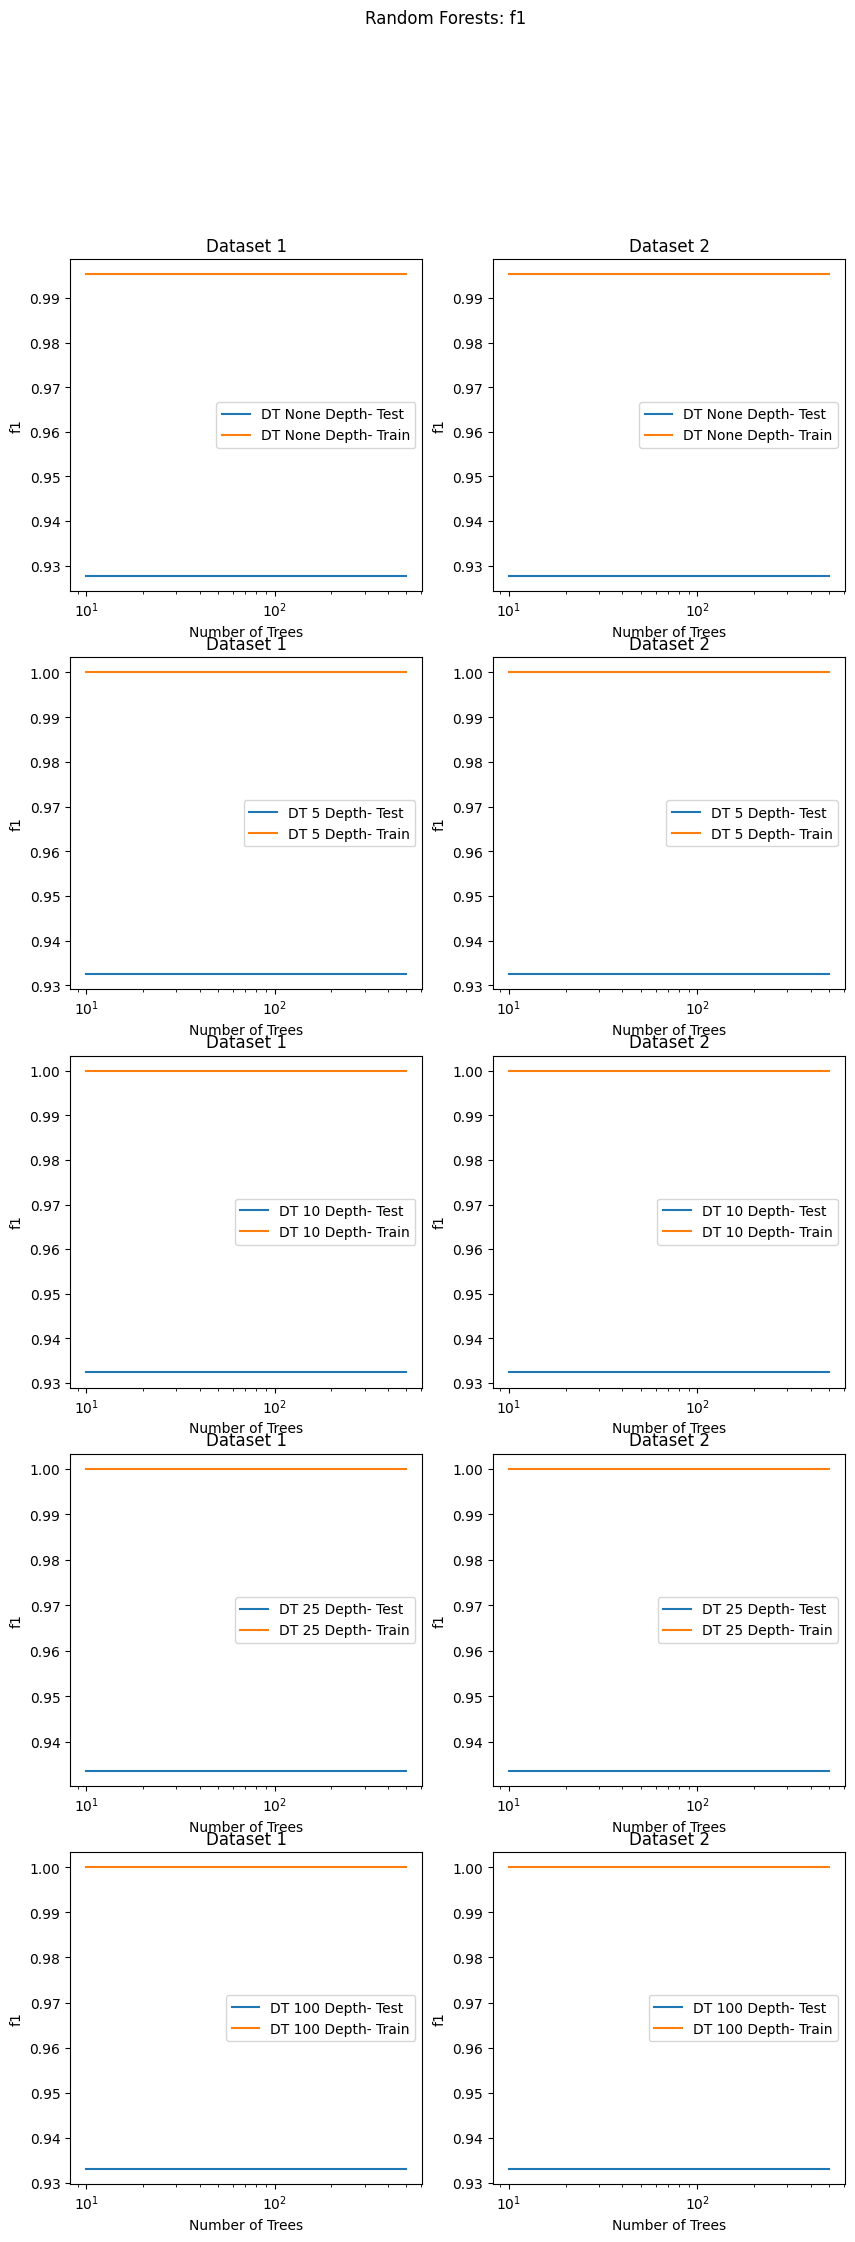

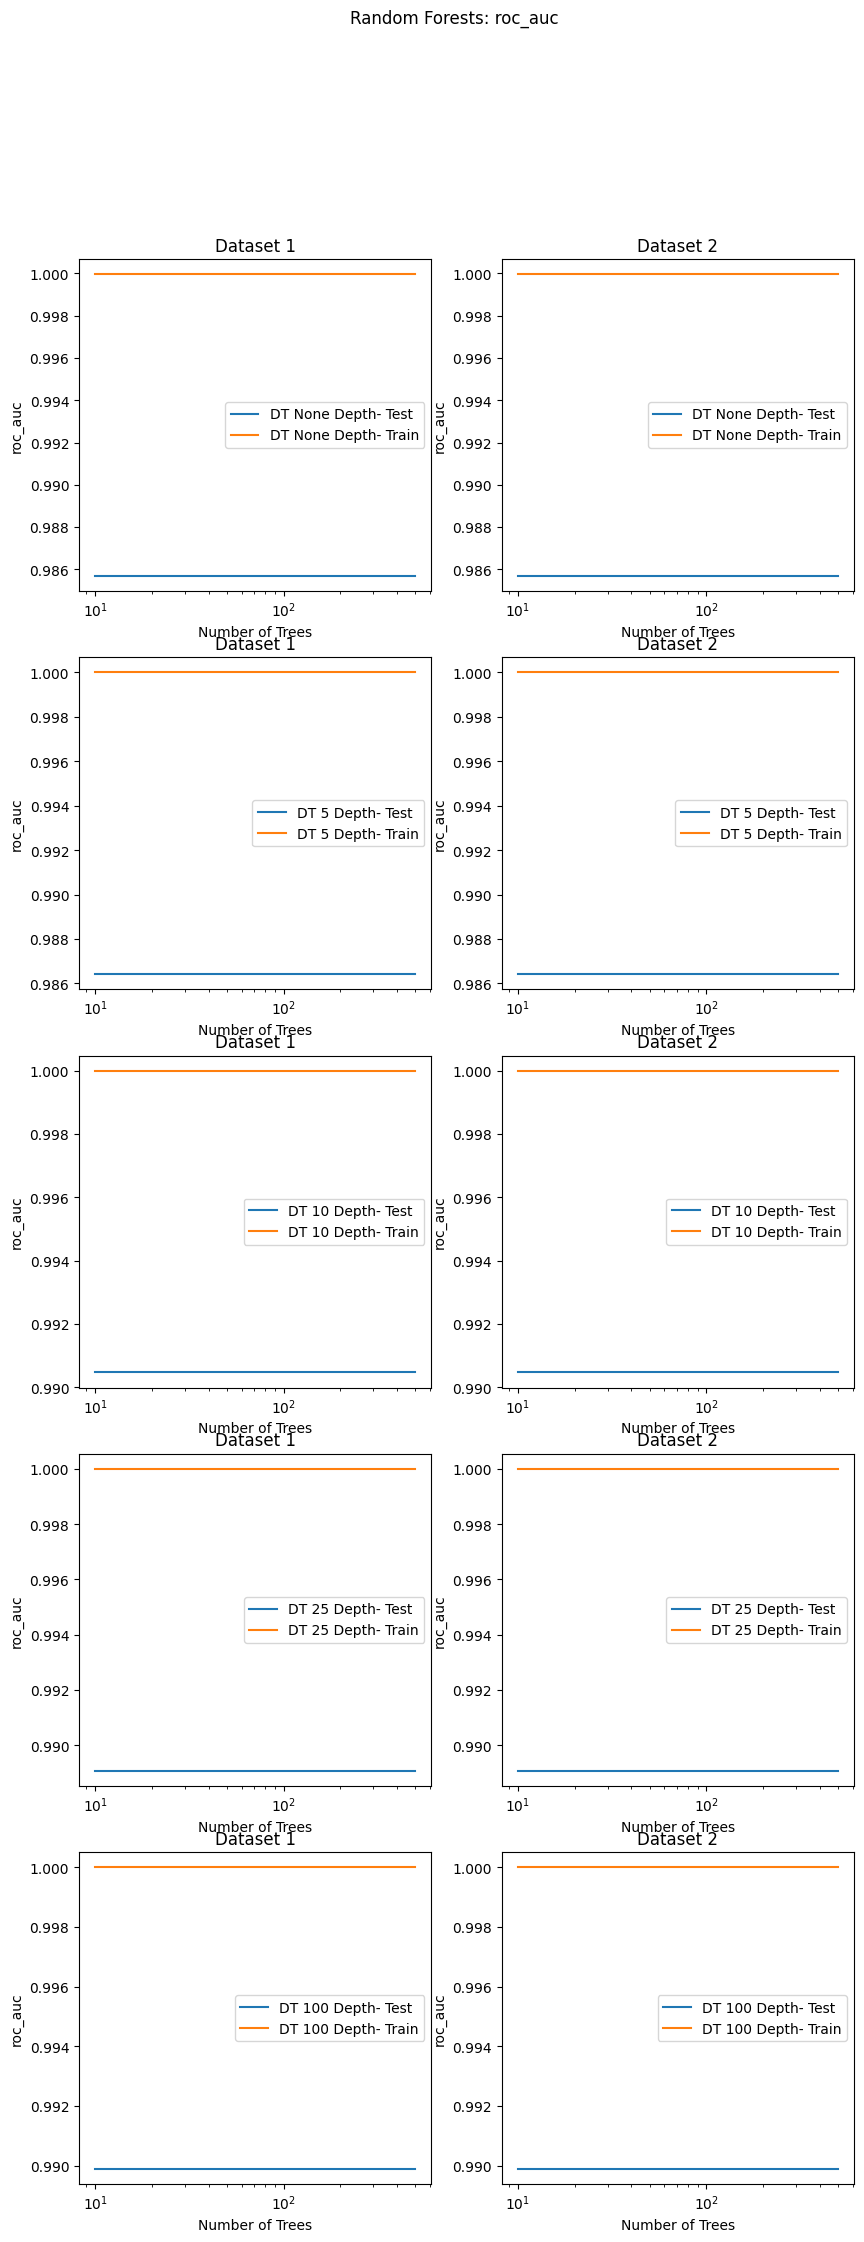

In [15]:
for sc in scoring_metrics:
    fig2, axs2 = plt.subplots(5, 2, figsize=(10, 25))
    testAcc1, trainAcc1, testAcc2, trainAcc2 = [], [], [], []
    for i in range(len(depth)):
        tac1, trac1, tac2, trac2 = [], [], [], []
        for j in range(len(num_Trees)):
            tac1.append(RFscores1[i*len(depth)+j][f'test_{sc}'])
            trac1.append(RFscores1[i*len(depth)+j][f'train_{sc}'])
            tac2.append(RFscores1[i*len(depth)+j][f'test_{sc}'])
            trac2.append(RFscores1[i*len(depth)+j][f'train_{sc}'])
        testAcc1.append(tac1)
        trainAcc1.append(trac1)
        testAcc2.append(tac2)
        trainAcc2.append(trac2)

    for i in range(len(depth)):
        axs2[i][0].plot(num_Trees, testAcc1[i], label=f"DT {depth[i]} Depth- Test")
        axs2[i][0].plot(num_Trees, trainAcc1[i], label=f"DT {depth[i]} Depth- Train")
        axs2[i][0].set_title('Dataset 1')
        axs2[i][1].plot(num_Trees, testAcc2[i], label=f"DT {depth[i]} Depth- Test")
        axs2[i][1].plot(num_Trees, trainAcc2[i], label=f"DT {depth[i]} Depth- Train")
        axs2[i][1].set_title('Dataset 2')

    for axs in axs2:
        for ax in axs:
            ax.legend()
            ax.set_xscale('log')
            ax.set_xlabel('Number of Trees')
            ax.set_ylabel(sc)
    fig2.suptitle('Random Forests: ' + sc)
    fig2.savefig(f'plots/RF_{sc}.jpg')

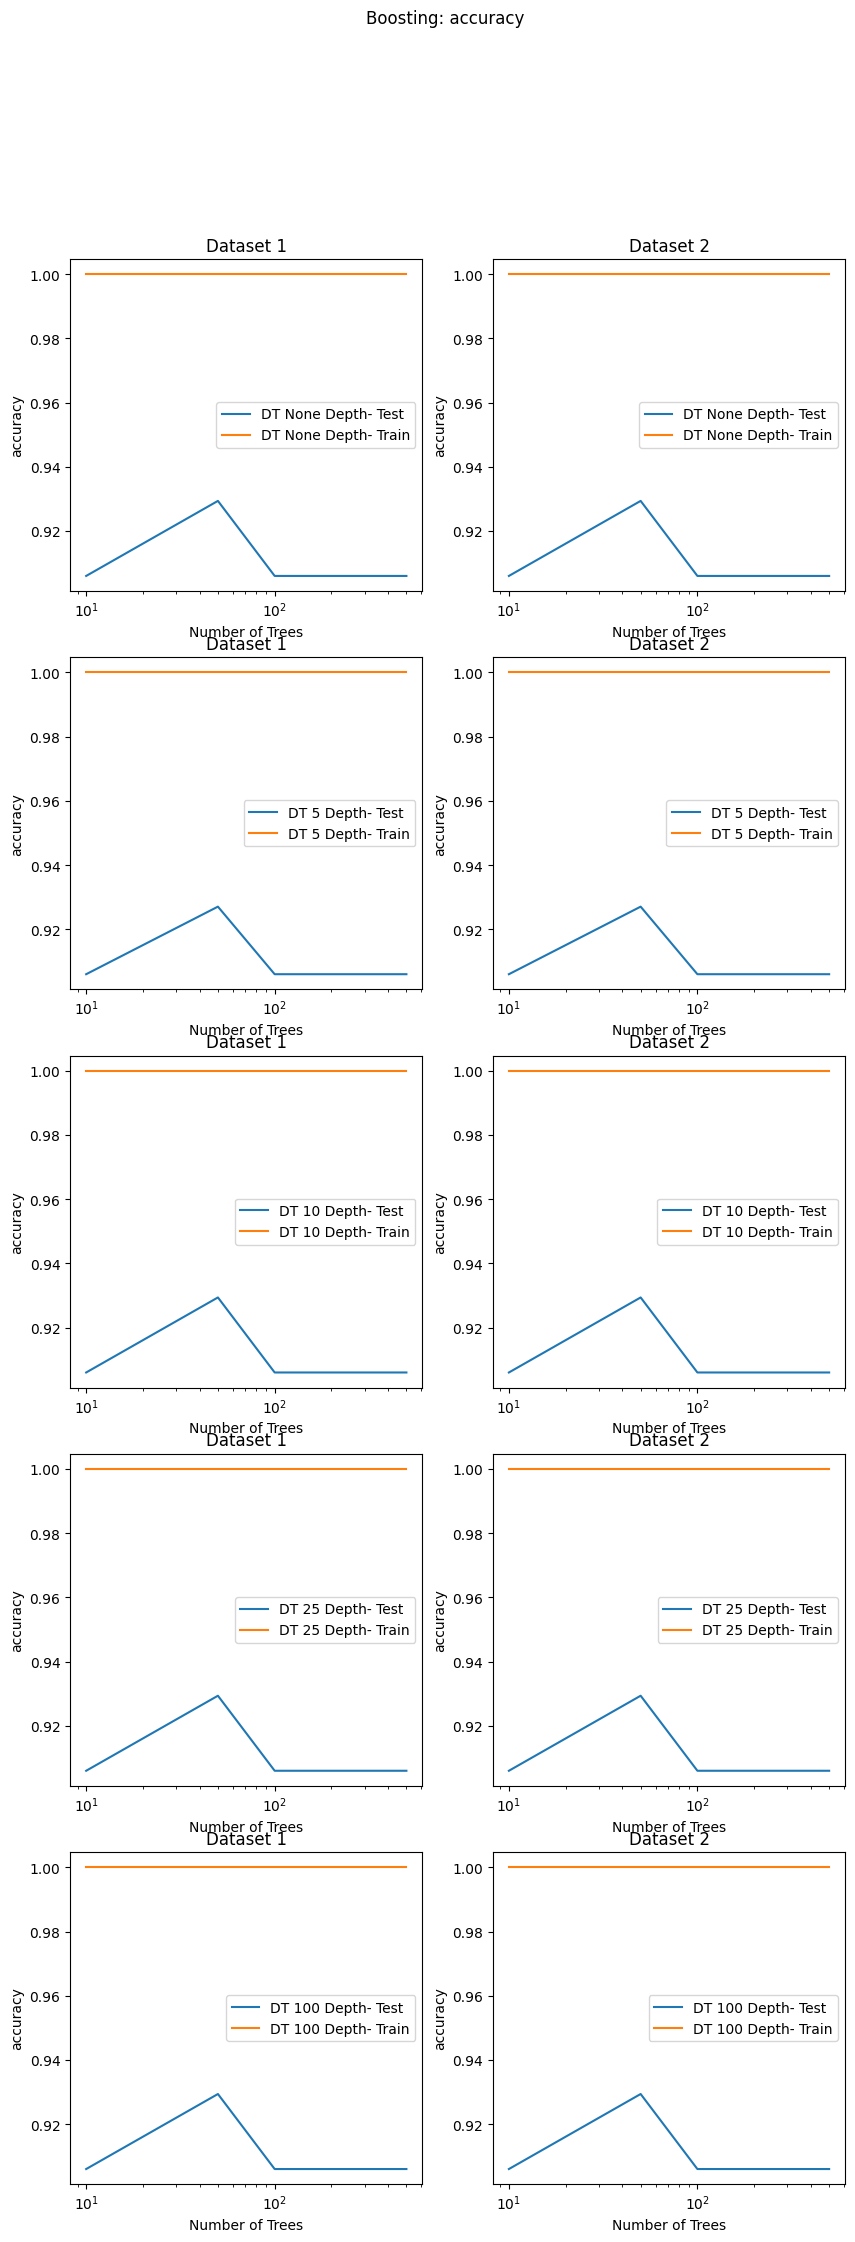

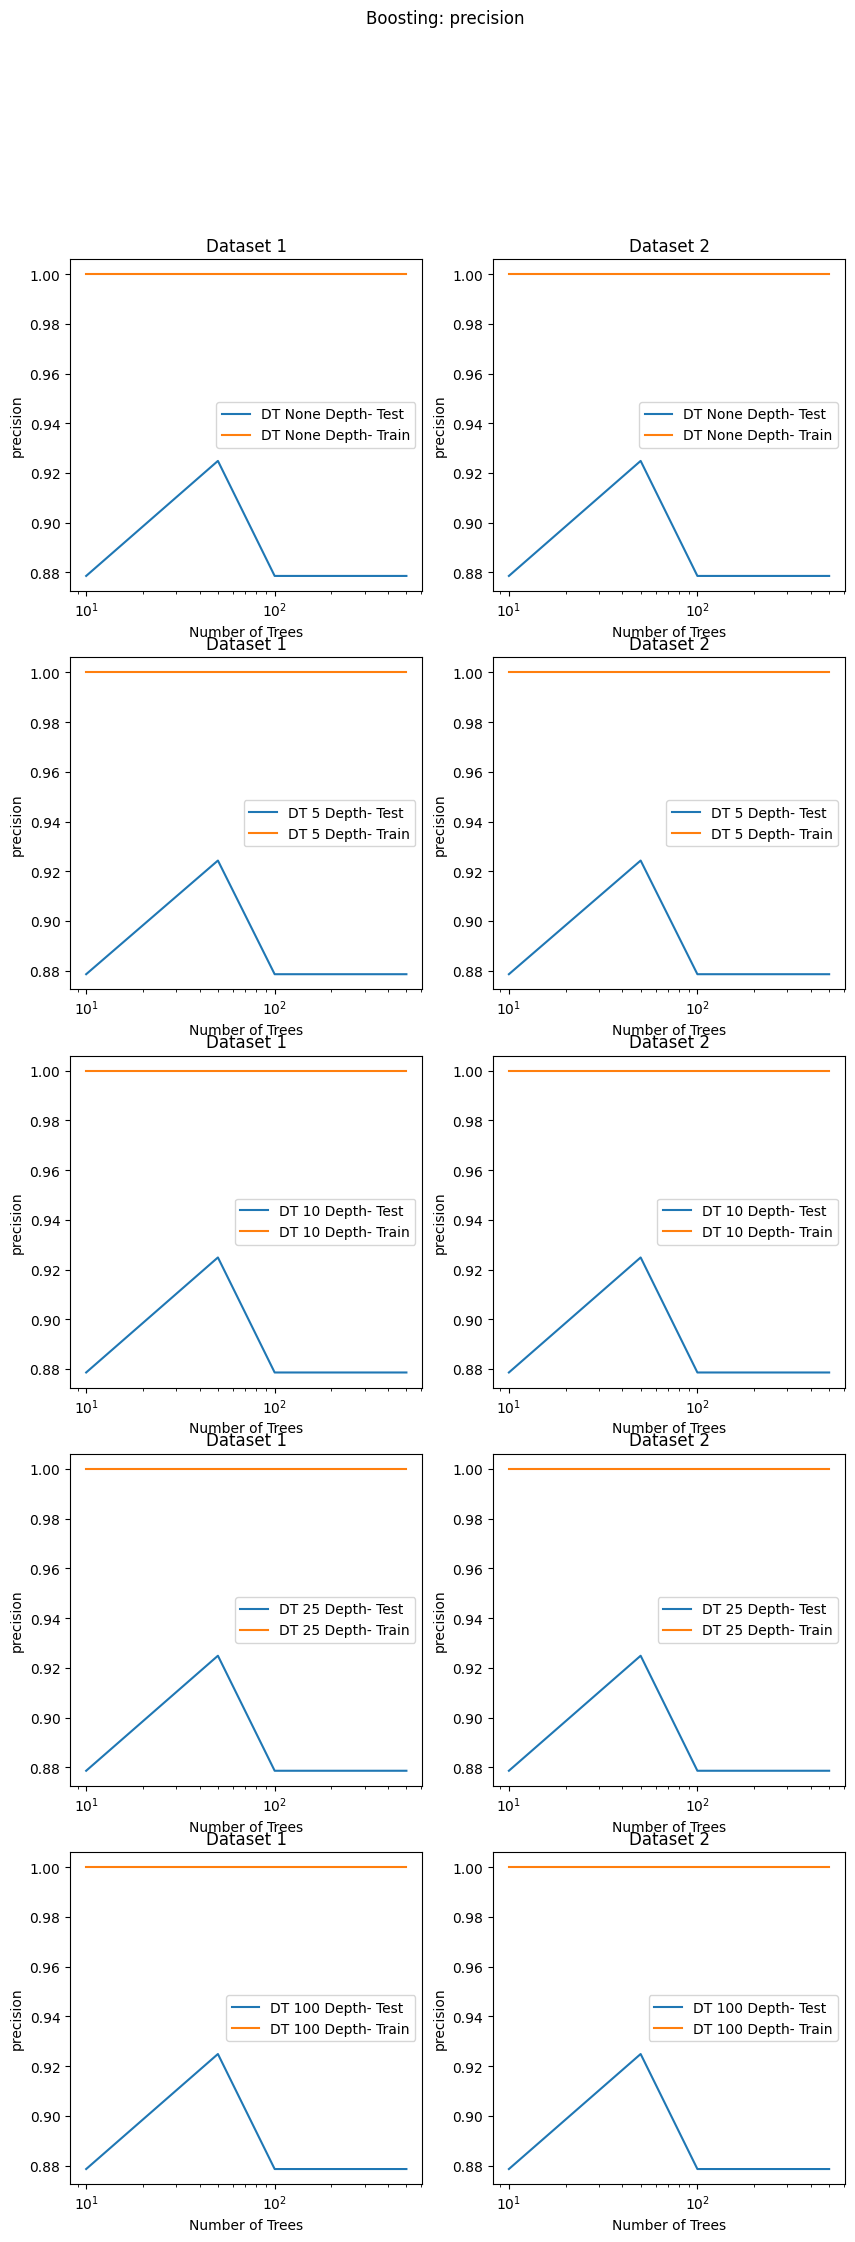

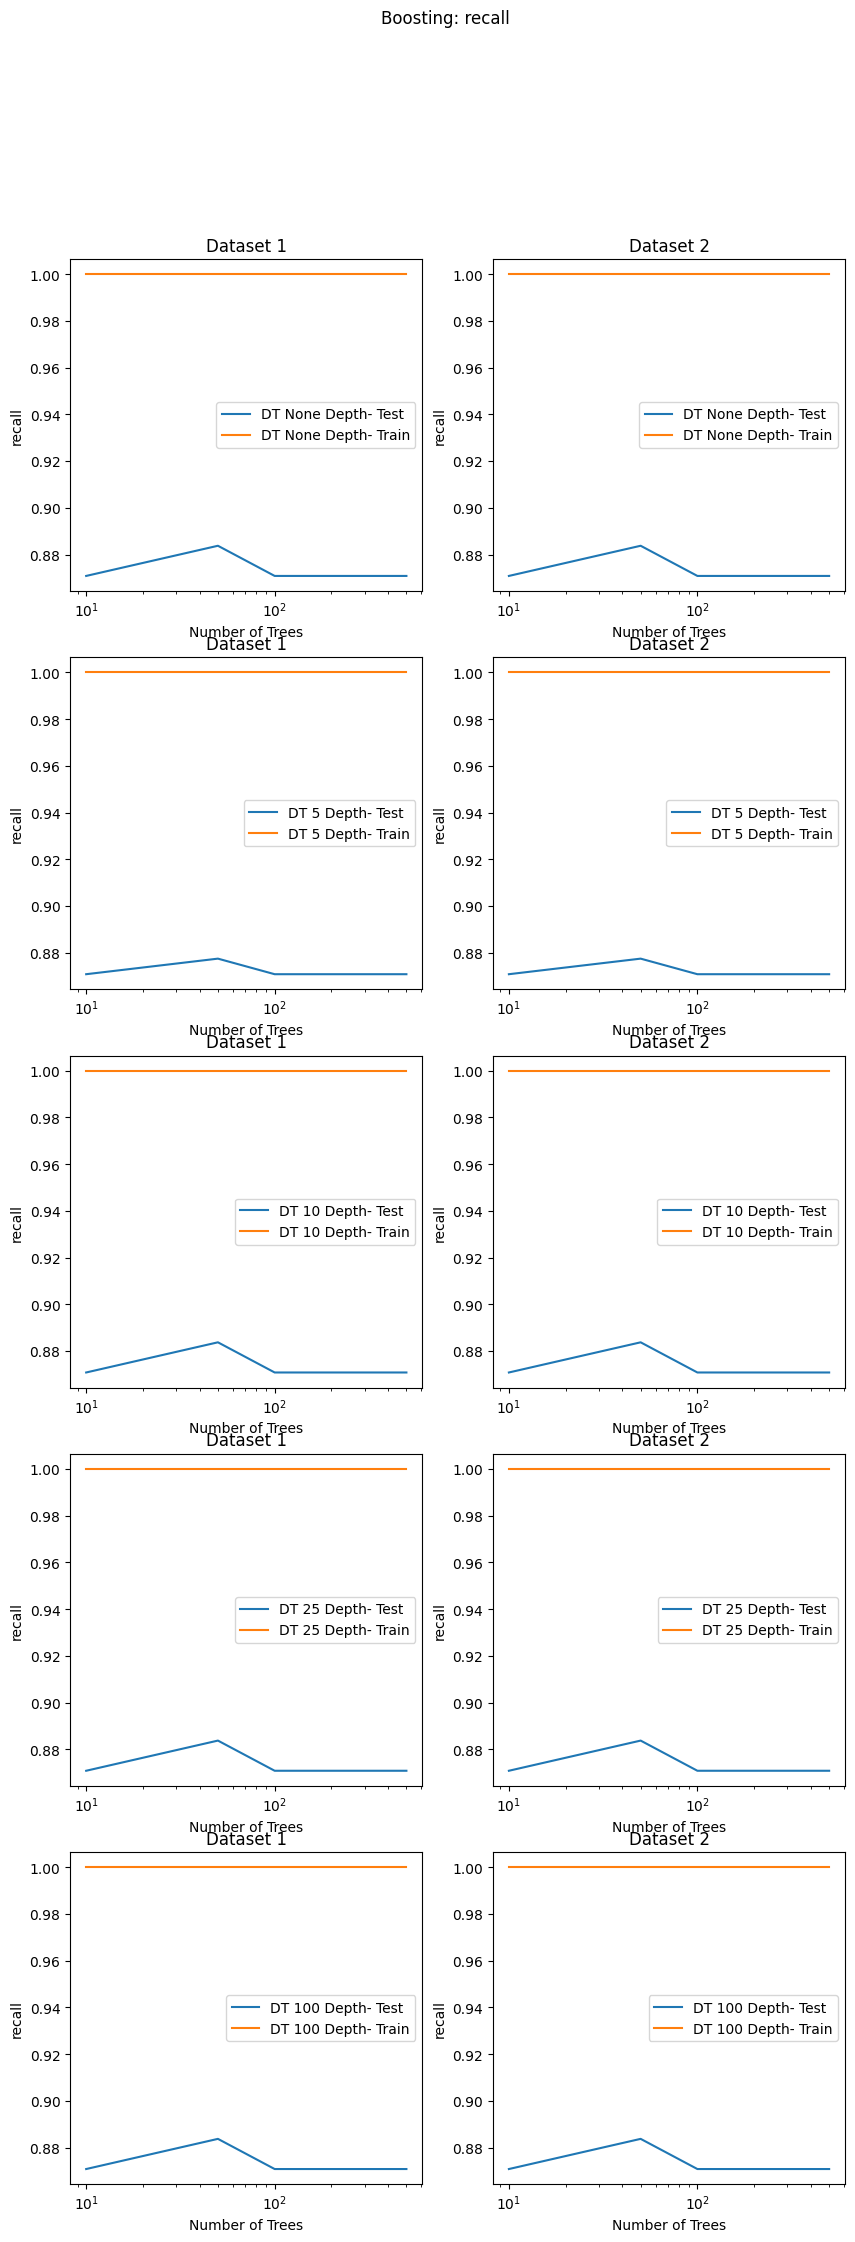

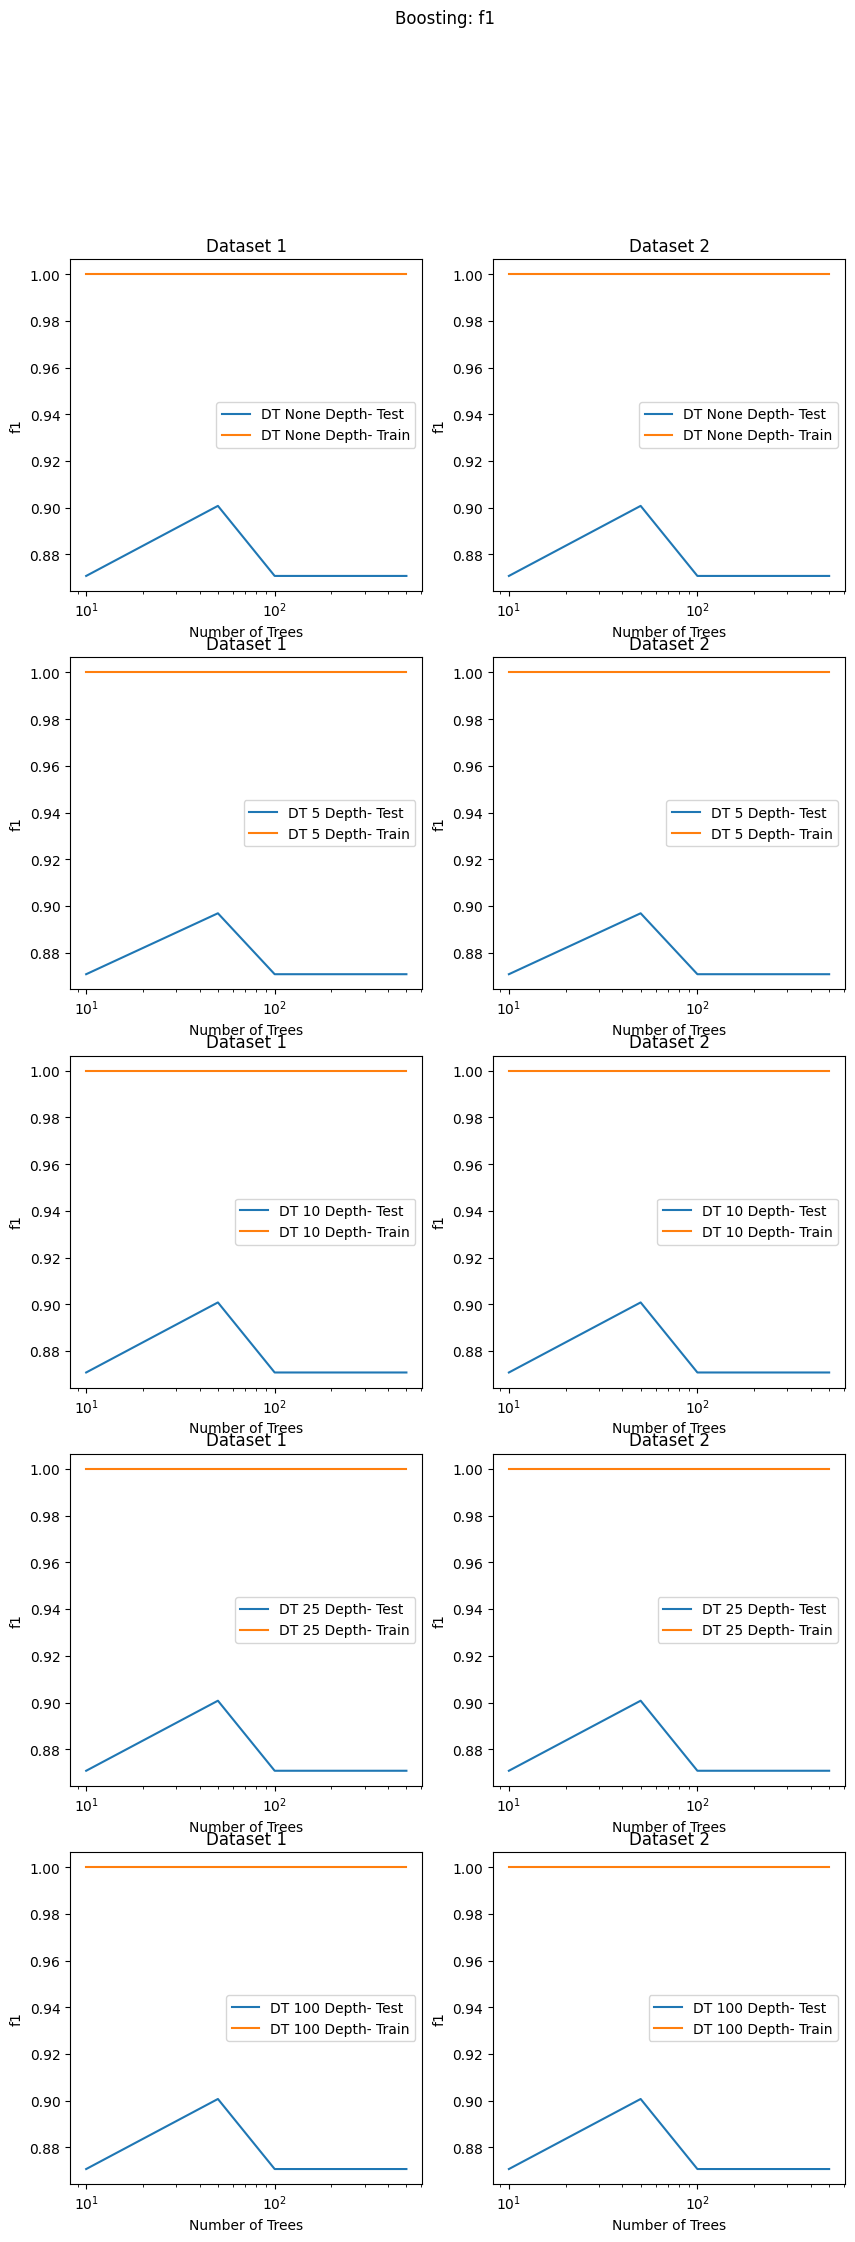

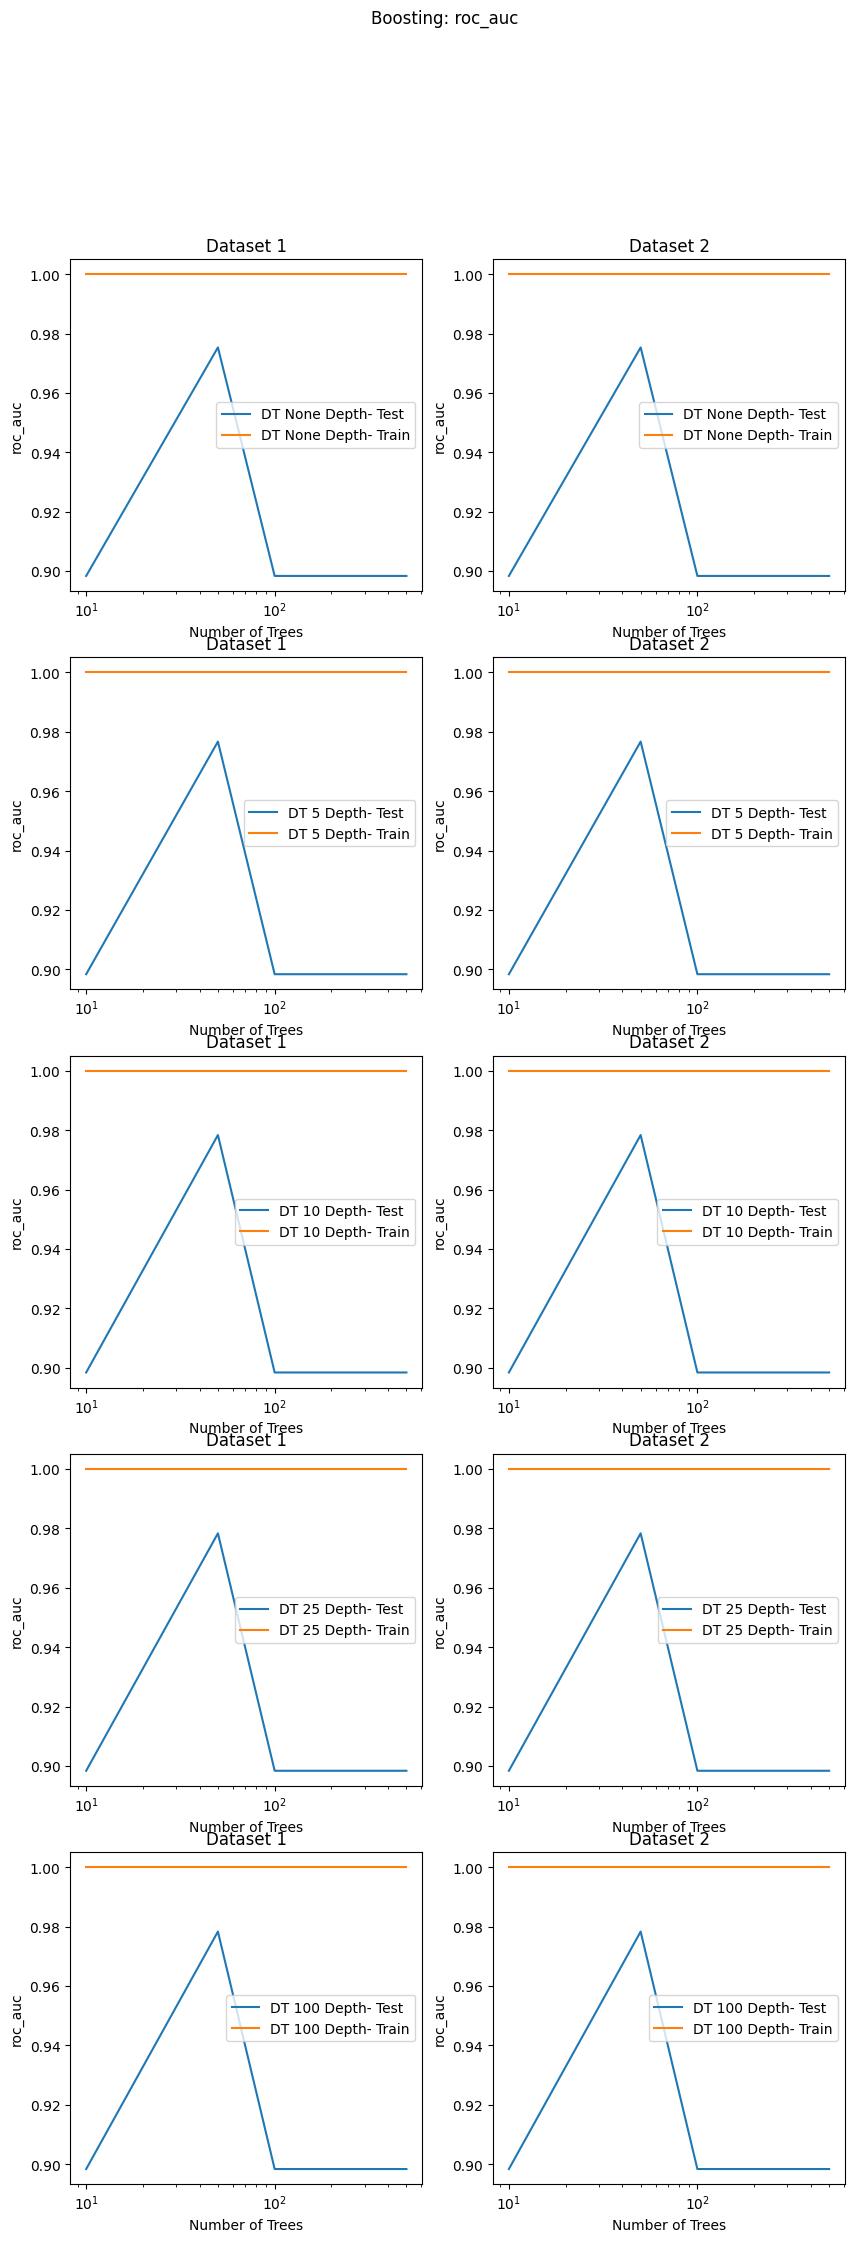

In [16]:
for sc in scoring_metrics:
    fig2, axs2 = plt.subplots(5, 2, figsize=(10, 25))
    testAcc1, trainAcc1, testAcc2, trainAcc2 = [], [], [], []
    for i in range(len(depth)):
        tac1, trac1, tac2, trac2 = [], [], [], []
        for j in range(len(num_Trees)):
            tac1.append(BoostScores1[i*len(depth)+j][f'test_{sc}'])
            trac1.append(BoostScores1[i*len(depth)+j][f'train_{sc}'])
            tac2.append(BoostScores1[i*len(depth)+j][f'test_{sc}'])
            trac2.append(BoostScores1[i*len(depth)+j][f'train_{sc}'])
        testAcc1.append(tac1)
        trainAcc1.append(trac1)
        testAcc2.append(tac2)
        trainAcc2.append(trac2)

    for i in range(len(depth)):
        axs2[i][0].plot(num_Trees, testAcc1[i], label=f"DT {depth[i]} Depth- Test")
        axs2[i][0].plot(num_Trees, trainAcc1[i], label=f"DT {depth[i]} Depth- Train")
        axs2[i][0].set_title('Dataset 1')
        axs2[i][1].plot(num_Trees, testAcc2[i], label=f"DT {depth[i]} Depth- Test")
        axs2[i][1].plot(num_Trees, trainAcc2[i], label=f"DT {depth[i]} Depth- Train")
        axs2[i][1].set_title('Dataset 2')

    for axs in axs2:
        for ax in axs:
            ax.legend()
            ax.set_xscale('log')
            ax.set_xlabel('Number of Trees')
            ax.set_ylabel(sc)
    fig2.suptitle('Boosting: ' + sc)
    fig2.savefig(f'plots/Boost_{sc}.jpg')